In [1]:
#import common modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#import own modules
from source.matrix_creation import polynomial_features,scale_features_by_intercept_use,standard_scaler
from source.main_methods import rescale_theta_intercept, predict_y, rescale_y
from source.plotting_exploration import plot_mse,plot_r2,explore_lambda,explore_polynomial_degree,plot_xy_xynoise_ypredicted,plot_theta_by_polynomials
from source.main_methods import OLS_parameters,Ridge_parameters
from source.errors import MSE,R2


## Notebook for assignment 1 parts a,b

Generating analysis plots for assignemtn 1 parts a) and b) exploring ordinary least squares and ridge regression. 

* Functions for the main methods can be found in source/main_methods.py
* Functions generating and scaling the feature matrix can be found in source/matrix_creation.py 
* Functions for calculating errors can be found in source/errors.py
* Functions for plotting and exploration can be found in source/plotting_exploration.py


### Setup for constants

In [28]:
# Runge's function - parameters to explore
n_datapoints = 200
standard_deviation = 0.1 # for noise
p = 15 # polynomial degree

lambda_range = (-1,-5) # range of lambda values for np.log
lambda_n = 20 # number lambda values to explore
lambdas = np.logspace(lambda_range[0],lambda_range[1],lambda_n) # lambdas generated in logspace for learning rate
lam = 0.01

# tolerance criteria for gradient descent methods
tolerance = 1e-6
max_iterations = 1000

use_intercept = True 
create_plots = True
verbose_bool = False

np.random.seed(250)  # ensure reproducibility numpy
random_state_int = 42   # ensure reproducibility train_test_split


### Generate Runge's function data

#### No noise

In [3]:
# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

#### With noise

In [4]:
# generating data with noise
x_noise = x
y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n_datapoints)

### Generate feature matrix, scale and split into training and test data

#### No noise

In [5]:
# creating design matrix with polynomial features: p
X = polynomial_features(x, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 

# split x for plotting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state_int)
# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_int)
X_train_scaled, X_test_scaled, X_train_mean, X_train_std = scale_features_by_intercept_use(X_train, X_test, use_intercept)
# scaling of y_train and y_test
y_train_scaled, y_test_scaled, y_train_mean, y_train_std = standard_scaler(y_train, y_test)

#### With noise

In [6]:
# creating design matrix with polynomial features: p
X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_noise, y_noise, test_size=0.2, random_state=random_state_int)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state = random_state_int)
X_train_scaled_noise, X_test_scaled_noise, X_mean, X_std = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
# scaling of y_train and y_test
y_train_scaled_noise, y_test_scaled_noise, y_train_mean_noise, y_train_std_noise = standard_scaler(y_train_noise, y_test_noise)

### Analysis

#### Checking own OLS against sklearn

In [7]:
# Calcualte OLS with sklearn as baseline values of intercept and theta
# Compare other regression results to this
ols_model_not_scaled = LinearRegression(fit_intercept=use_intercept)
ols_model_scaled = LinearRegression(fit_intercept=use_intercept)
ols_sklearn_not_scaled = ols_model_not_scaled.fit(X_train, y_train)
ols_sklearn_scaled = ols_model_scaled.fit(X_train_scaled, y_train_scaled)
print("Baseline with OLS for comparison of other regressions:")
print("Results from sklearn OLS:\n")
print(f"    sklearn OLS not scaled.\n       Coef: {ols_sklearn_not_scaled.coef_}\n")
print(f"    sklearn OLS scaled.\n       Coef: {ols_sklearn_scaled.coef_}\n")

ols_ours_not_scaled= OLS_parameters(X_train,y_train)
ols_ours_scaled = OLS_parameters(X_train_scaled,y_train_scaled)
print("Results from our OLS code:\n")
print(f"    our OLS not scaled. \n      Coef: {ols_ours_not_scaled}\n")
print(f"    our OLS scaled.\n       Coef: {ols_ours_scaled}")
print('\n')


Baseline with OLS for comparison of other regressions:
Results from sklearn OLS:

    sklearn OLS not scaled.
       Coef: [ 0.00000000e+00 -1.89505622e-02 -1.48554451e+01  4.69873421e-01
  1.17674621e+02 -3.18374577e+00 -4.87659212e+02  9.63983667e+00
  1.11001218e+03 -1.50234707e+01 -1.39703356e+03  1.21859184e+01
  9.10757456e+02 -4.59203726e+00 -2.39833831e+02  5.21970151e-01]

    sklearn OLS scaled.
       Coef: [ 0.00000000e+00 -3.84124409e-02 -1.57021393e+01  6.47120540e-01
  1.14638971e+02 -3.59583132e+00 -4.35007414e+02  9.53913722e+00
  9.17145862e+02 -1.34608647e+01 -1.08063971e+03  1.00828128e+01
  6.65321405e+02 -3.55562693e+00 -1.66639476e+02  3.81893641e-01]

Results from our OLS code:

    our OLS not scaled. 
      Coef: [ 9.55545646e-01 -1.89505772e-02 -1.48554442e+01  4.69873891e-01
  1.17674608e+02 -3.18375049e+00 -4.87659133e+02  9.63985868e+00
  1.11001196e+03 -1.50235243e+01 -1.39703324e+03  1.21859888e+01
  9.10757217e+02 -4.59208454e+00 -2.39833763e+02  5.2198

#### Explore OLS in regards to polynomial degree, without noise

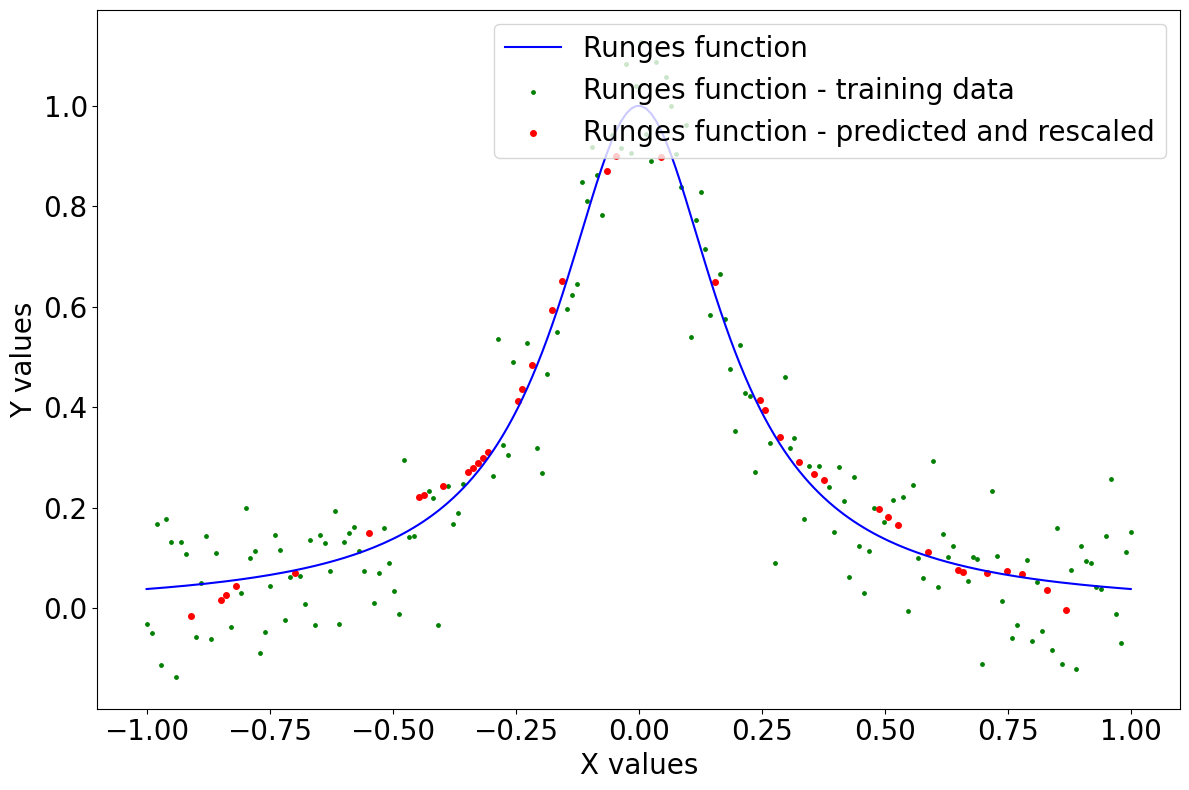

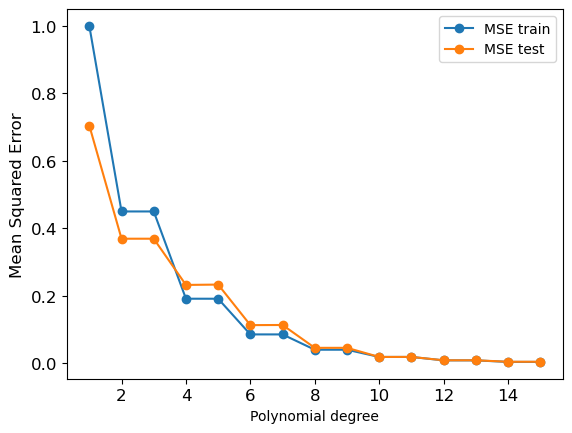

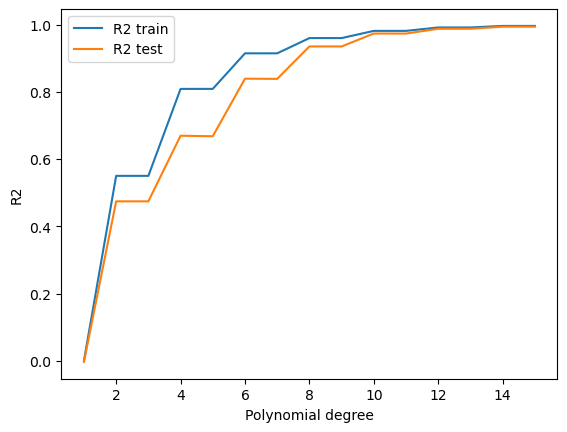

In [14]:
# scaled data for features as input 
polynomial_degree, mse_train, mse_test, r2_train, r2_test, thetas_ols = explore_polynomial_degree(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, p, use_intercept=use_intercept, verbose=verbose_bool)

# rescaled coef and intercept as qc
rescaled_coef_ols, rescaled_intercept_ols = rescale_theta_intercept(thetas_ols[-1][1:], thetas_ols[-1][0], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)
y_predicted_scaled_ols = predict_y(X_test_scaled[:, 1:], rescaled_coef_ols)
y_predicted_rescaled_ols = rescale_y(y_predicted_scaled_ols, y_train_std, y_train_mean)

if create_plots:
    plot_xy_xynoise_ypredicted(x, y, x_train_noise, y_train_noise, y_predicted_rescaled_ols, x_test, n_datapoints, "OLS", p, True)

    plot_mse("OLS", p, n_datapoints, polynomial_degree, mse_train, mse_test, noise=False)
    plot_r2("OLS", p, n_datapoints, polynomial_degree, r2_train, r2_test, noise=False)
 

#### Exploring theta values in regards to polynomial degree, without noise

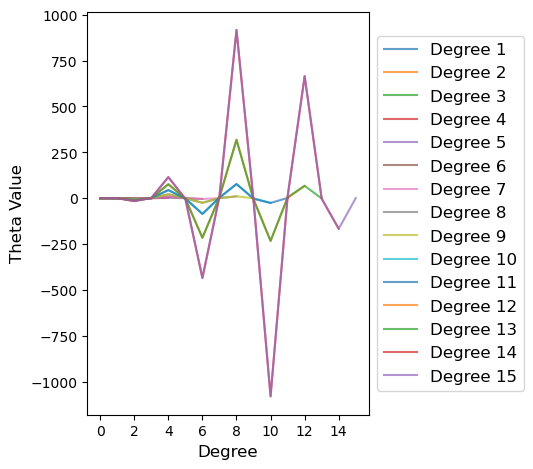

In [16]:
# Plot theta values as function if polynomial degree
if create_plots: plot_theta_by_polynomials(thetas_ols, p, n_datapoints)

#### Explore OLS in regards to polynomial degree, with noise

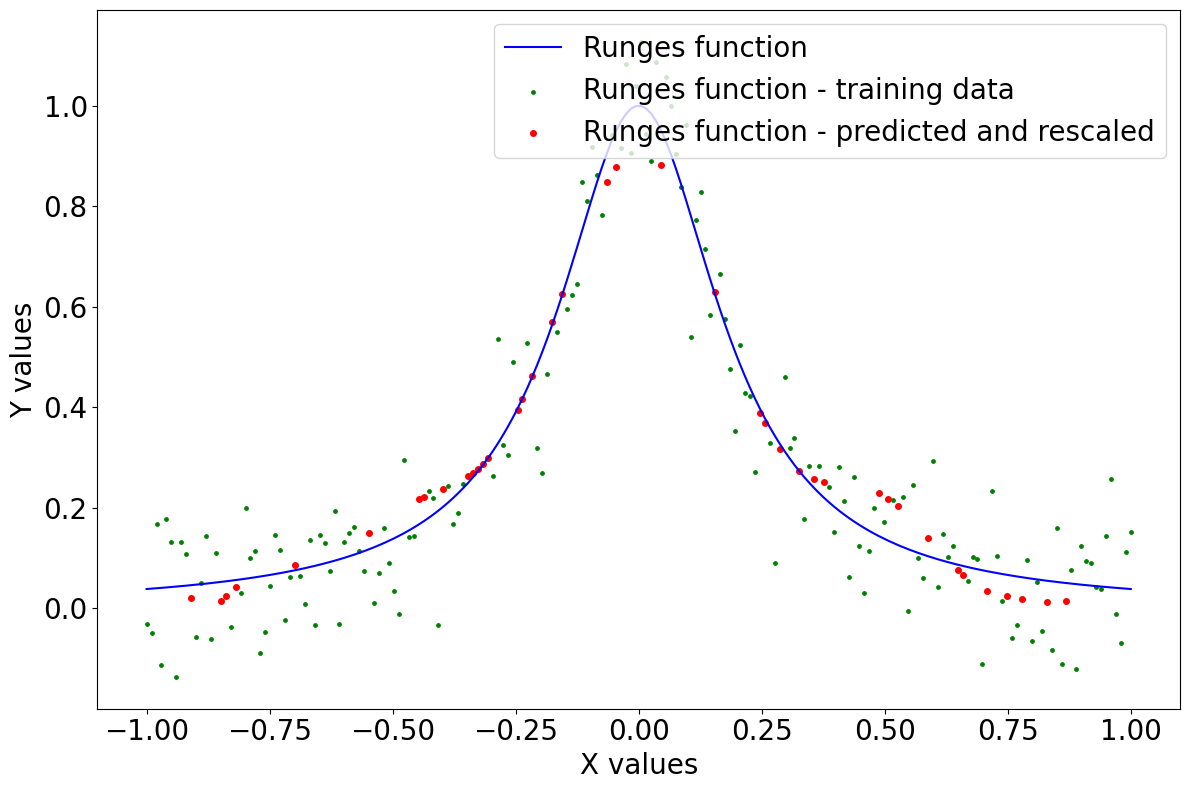

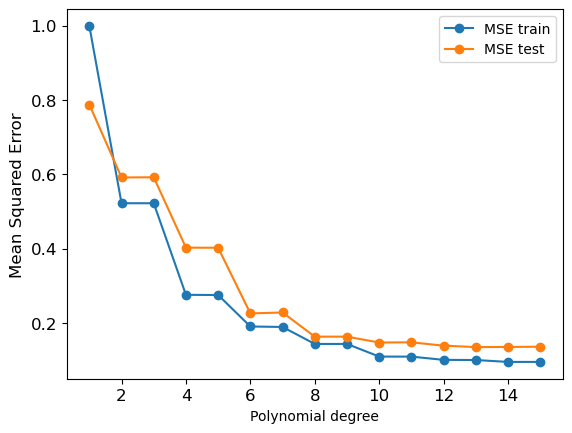

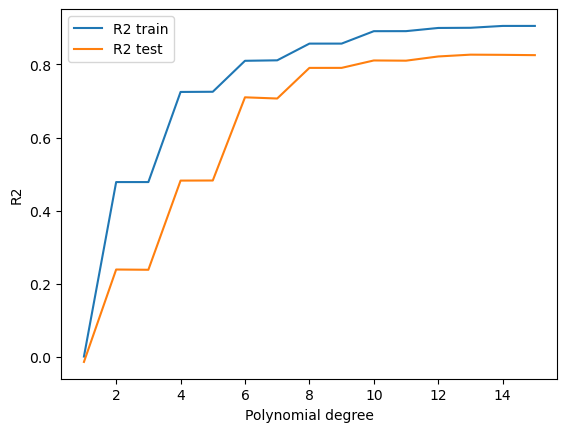

In [13]:
# scaled data for features as input
polynomial_degree, mse_train, mse_test, r2_train, r2_test, thetas_ols_noise = explore_polynomial_degree(X_train_scaled_noise, X_test_scaled_noise, y_train_scaled_noise, y_test_scaled_noise, p, use_intercept=use_intercept, verbose=verbose_bool)
# rescaled coef and intercept as qc, calculated rescaled y_predict
rescaled_coef_ols_noise, rescaled_intercept_ols_noise = rescale_theta_intercept(thetas_ols_noise[-1][1:], thetas_ols_noise[-1][0], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)
y_predicted_scaled_ols_noise = predict_y(X_test_scaled_noise[:, 1:], rescaled_coef_ols_noise)
y_predicted_rescaled_ols_noise = rescale_y(y_predicted_scaled_ols_noise, y_train_std, y_train_mean)

if create_plots: #MSE, R2 and function with noise
    plot_xy_xynoise_ypredicted(x, y, x_train_noise, y_train_noise, y_predicted_rescaled_ols_noise, x_test, n_datapoints, "OLS", p, True)
    plot_mse("OLS", p, n_datapoints, polynomial_degree, mse_train, mse_test, noise=True)
    plot_r2("OLS", p, n_datapoints, polynomial_degree, r2_train, r2_test, noise=True)

#### Exploring theta values in regards to polynomial degree, with noise

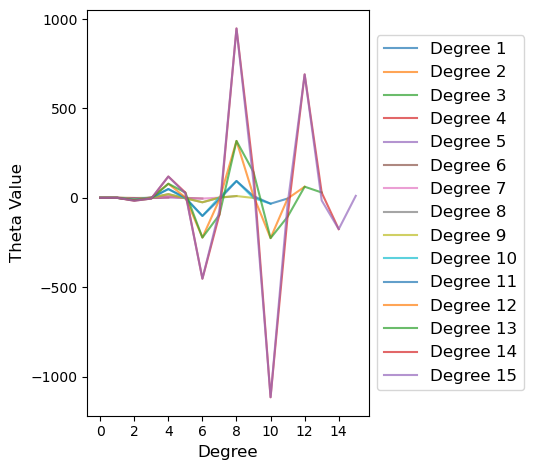

In [12]:
# Plot theta values as function if polynomial degree
if create_plots: plot_theta_by_polynomials(thetas_ols_noise, p, n_datapoints)

#### Explore Ridge regression in regards to lambda values, without noise

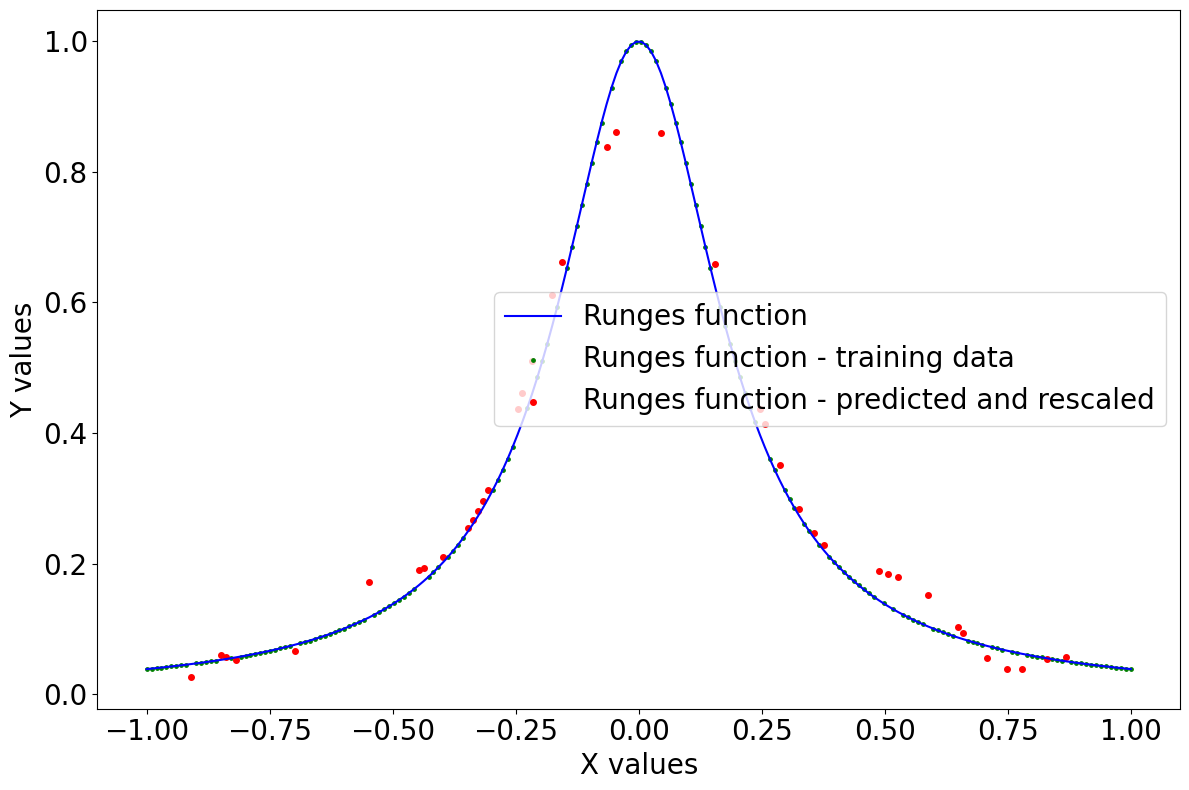

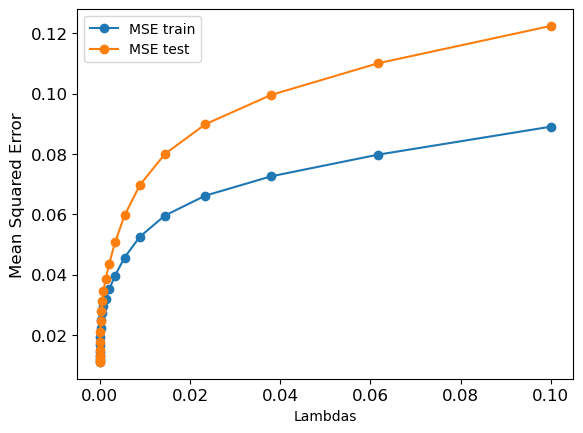

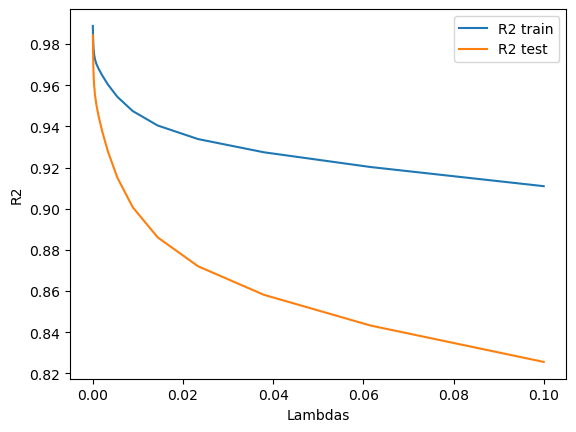

In [38]:
# Explore lambdas with Ridge regression - no noise
mse_train_ridge, mse_test_ridge, r2_train_ridge, r2_test_ridge, thetas_ridge = explore_lambda(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, lambdas, verbose=verbose_bool)

# rescaled coef and intercept as qc
rescaled_coef_ridge, rescaled_intercept_ridge = rescale_theta_intercept(theta_ridge[-1][1:], theta_ridge[-1][0], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)
y_predicted_scaled_ridge = predict_y(X_test_scaled[:, 1:], rescaled_coef_ridge)
y_predicted_rescaled_ridge = rescale_y(y_predicted_scaled_ridge, y_train_std, y_train_mean)

if create_plots: #MSE and R2 with no noise
    plot_xy_xynoise_ypredicted(x, y, x_train, y_train, y_predicted_rescaled_ridge, x_test, n_datapoints, "Ridge", p, True,lambda_value=lambdas[-1])
    plot_mse("Ridge", p, n_datapoints, lambdas, mse_train_ridge, mse_test_ridge, noise=False)
    plot_r2("Ridge", p, n_datapoints, lambdas, r2_train_ridge, r2_test_ridge, noise=False)


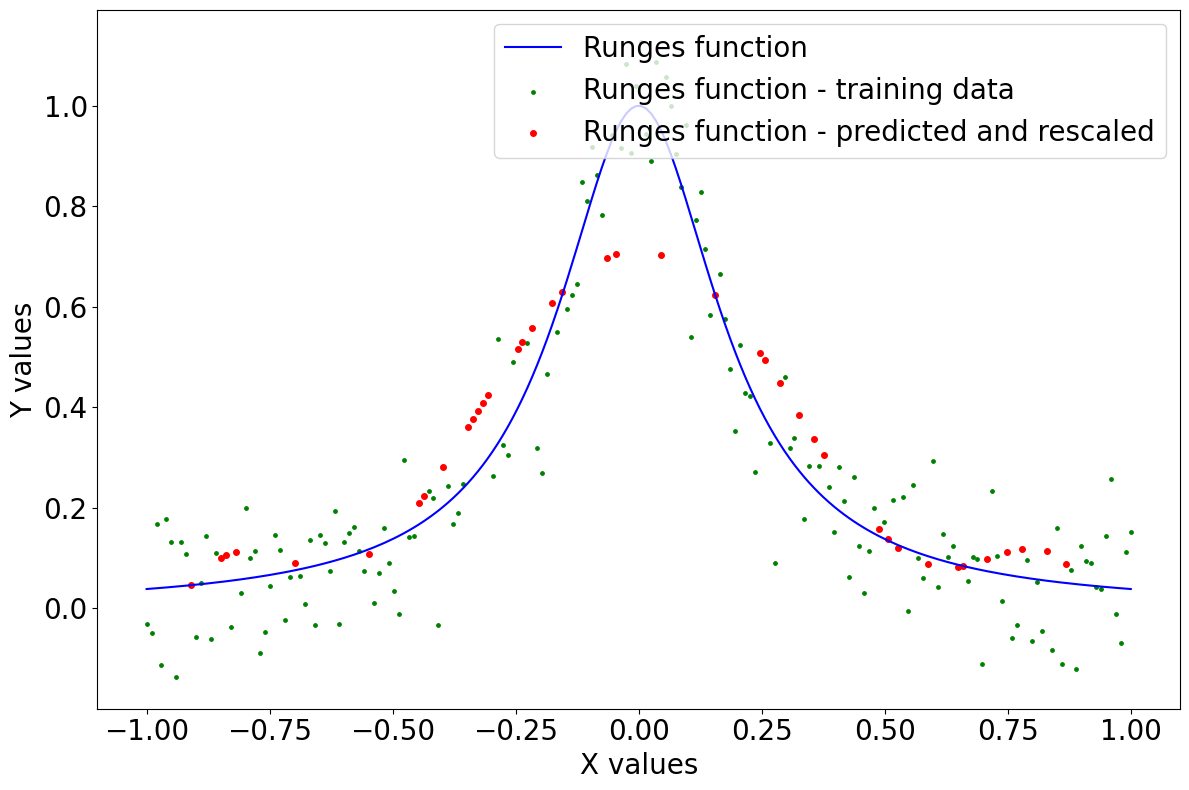

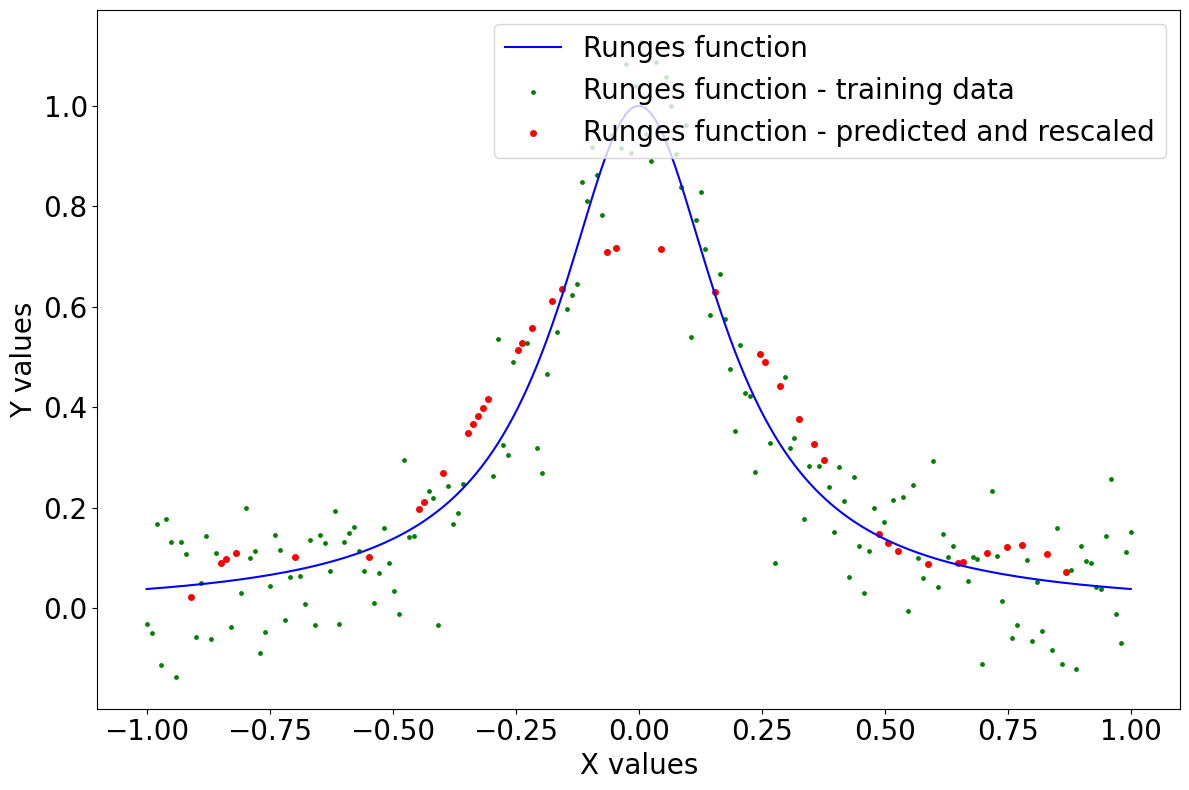

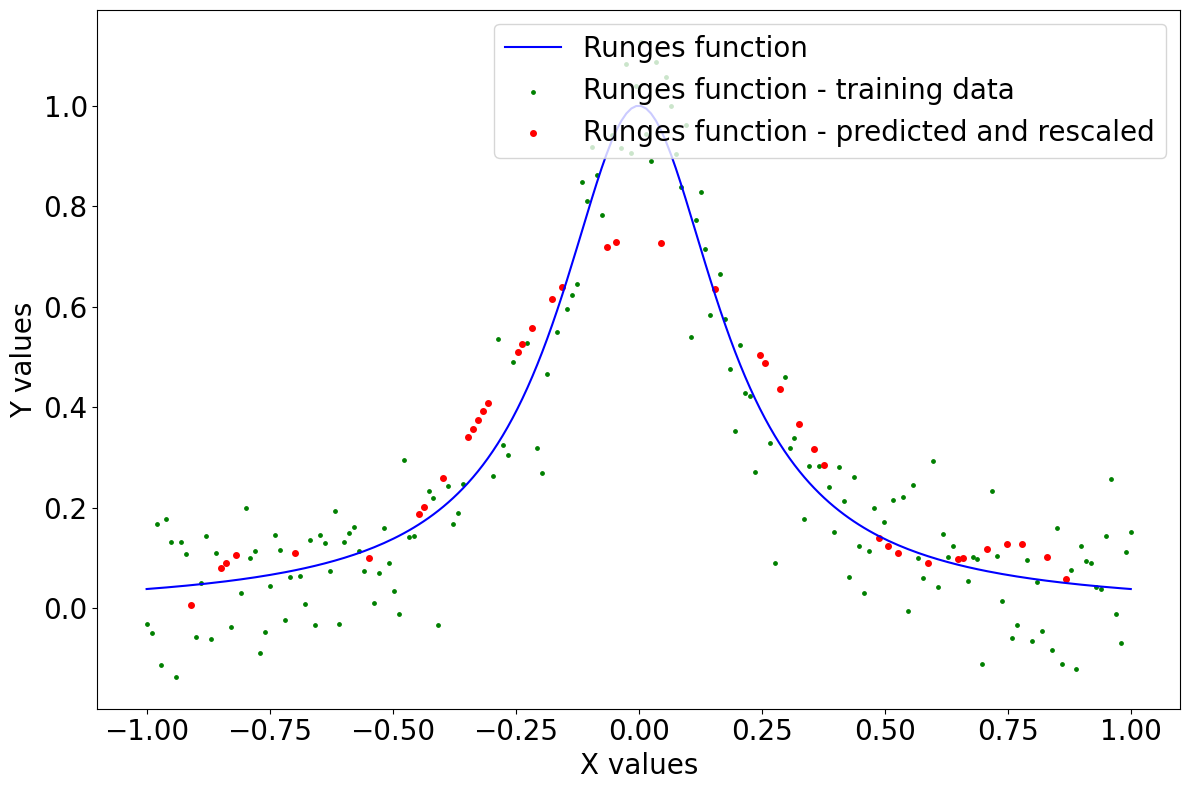

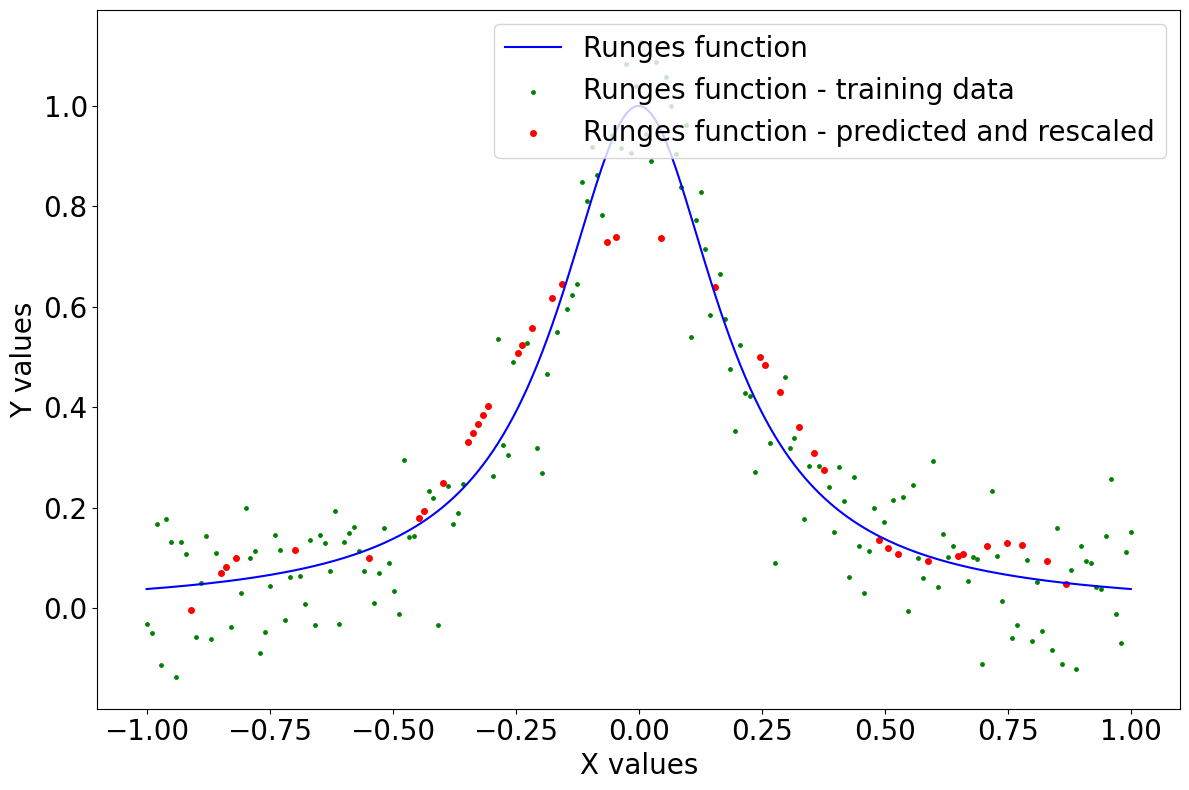

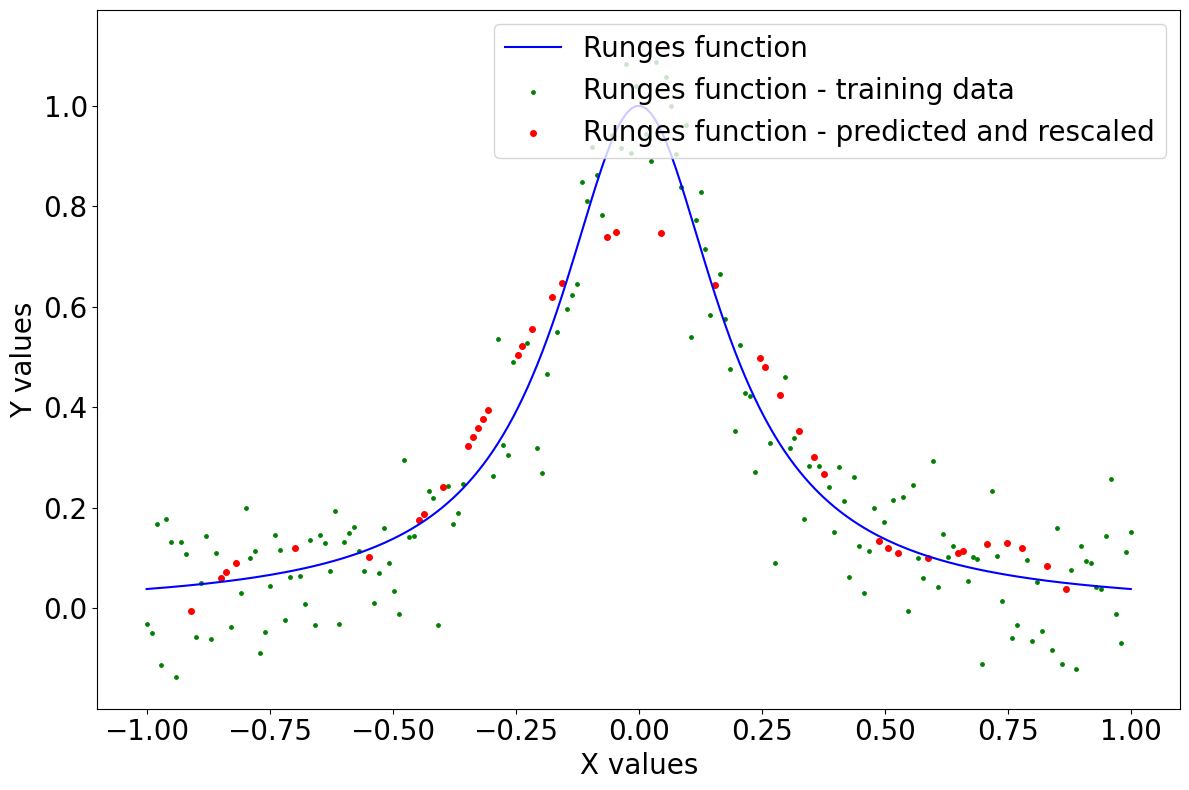

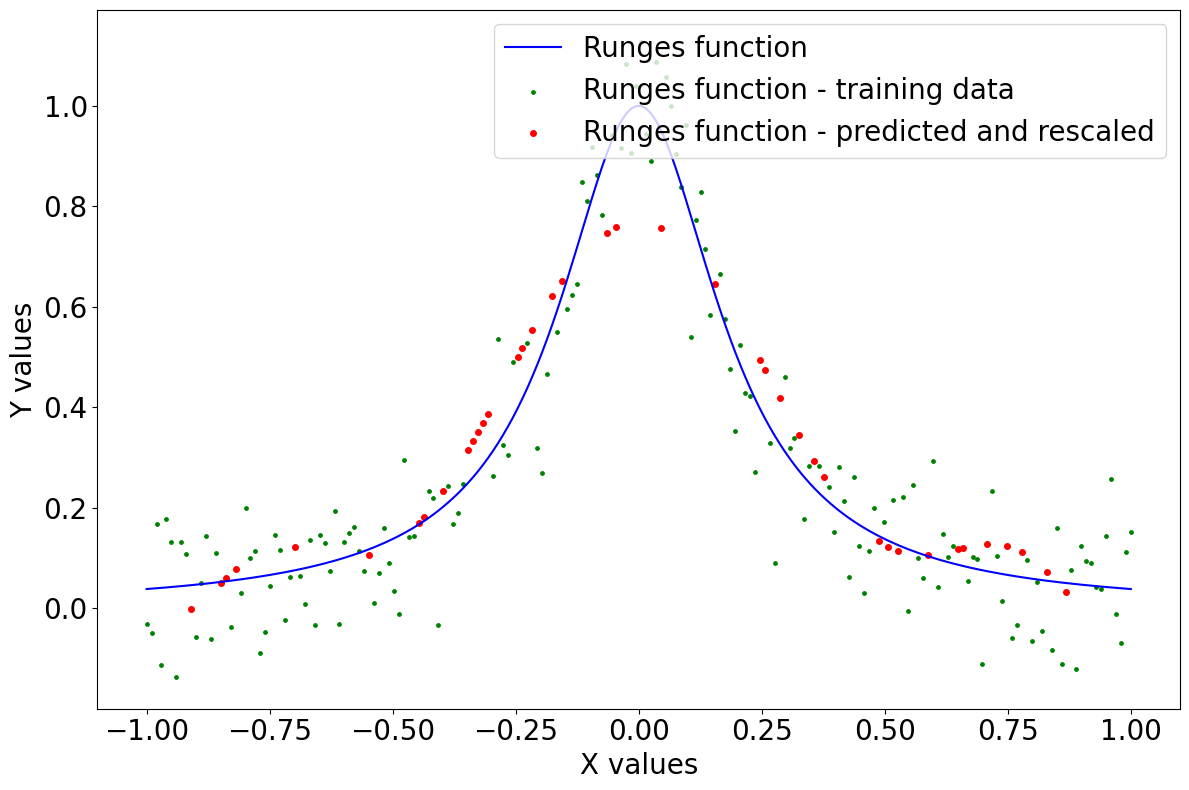

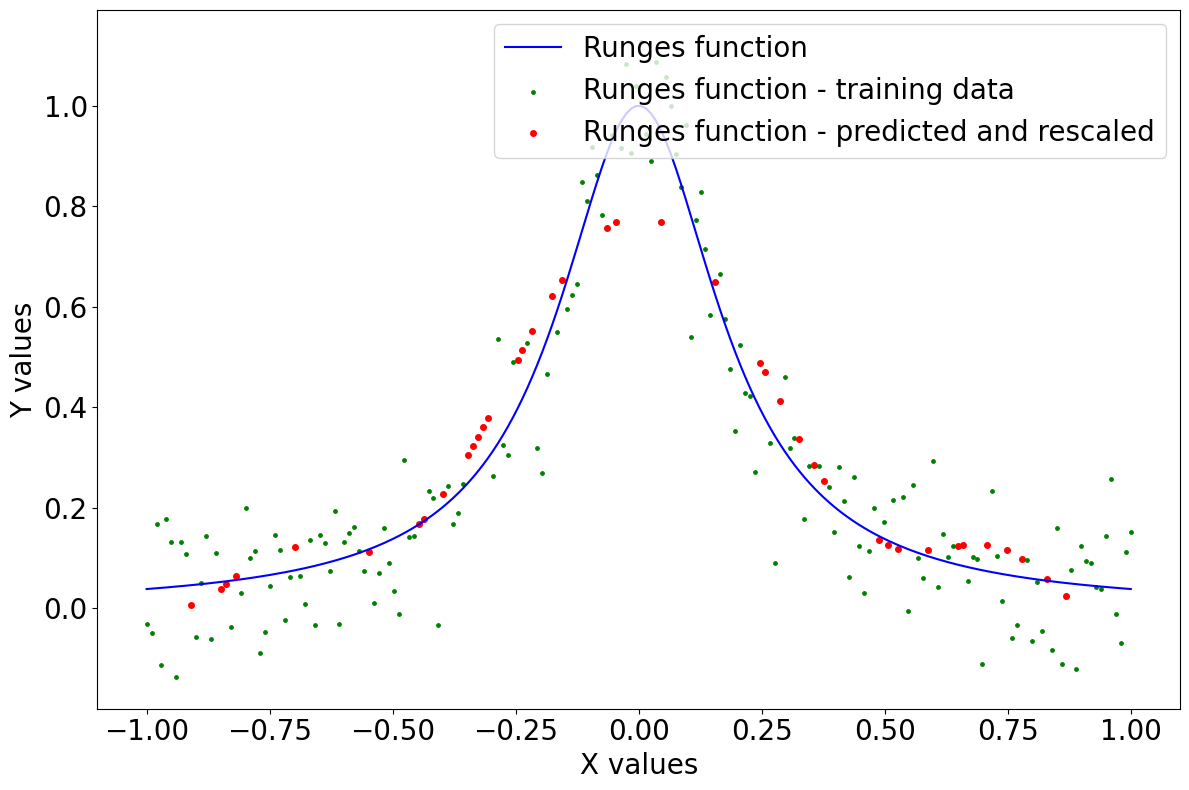

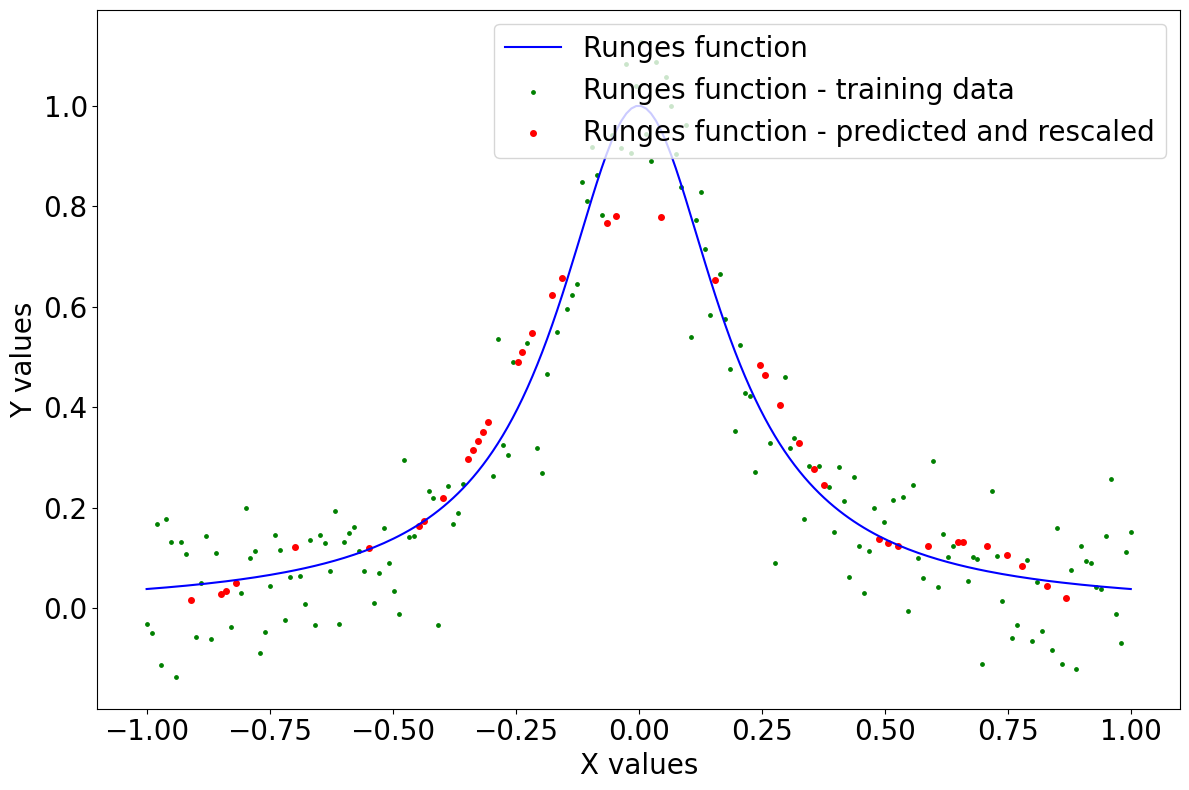

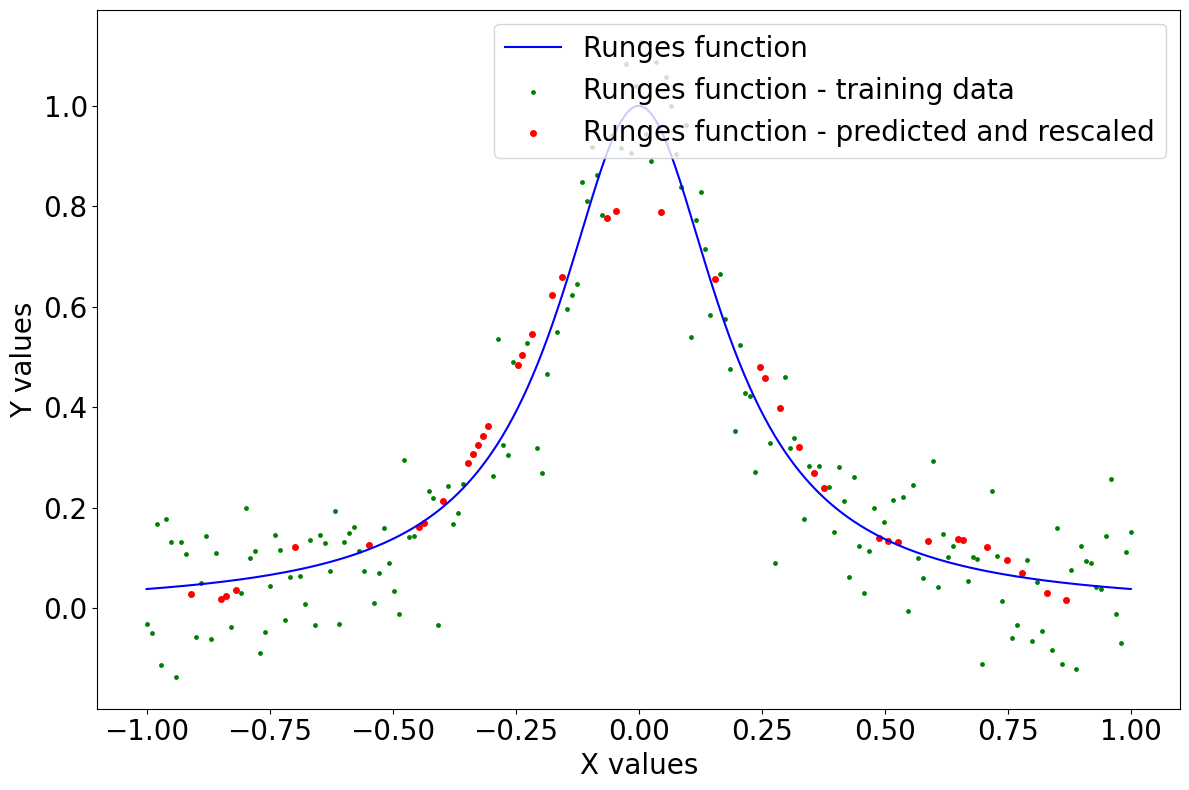

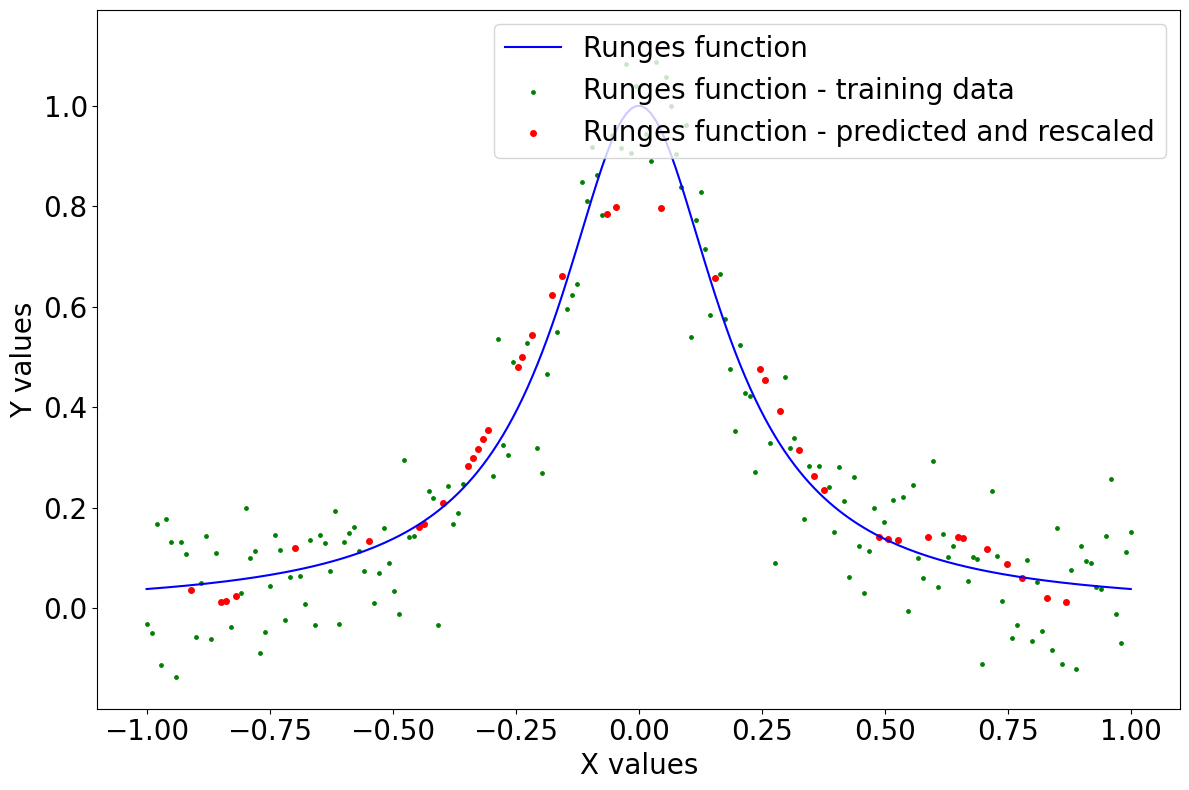

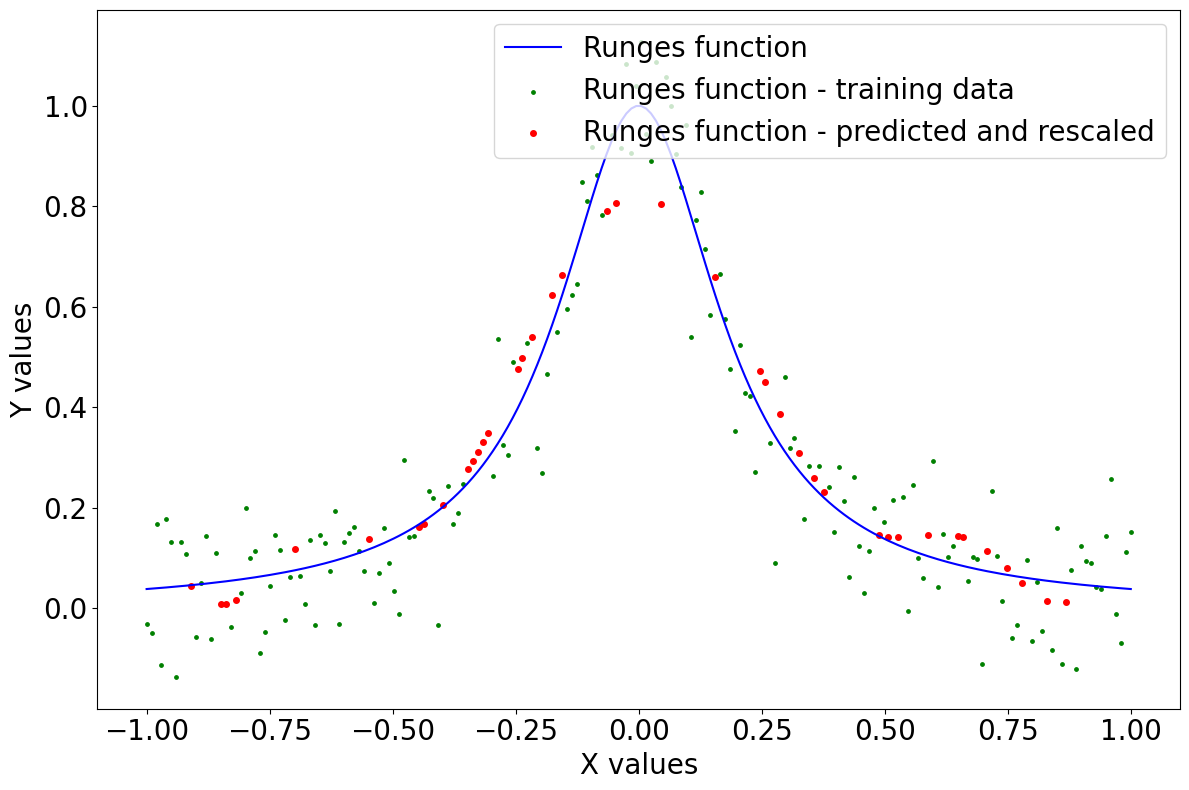

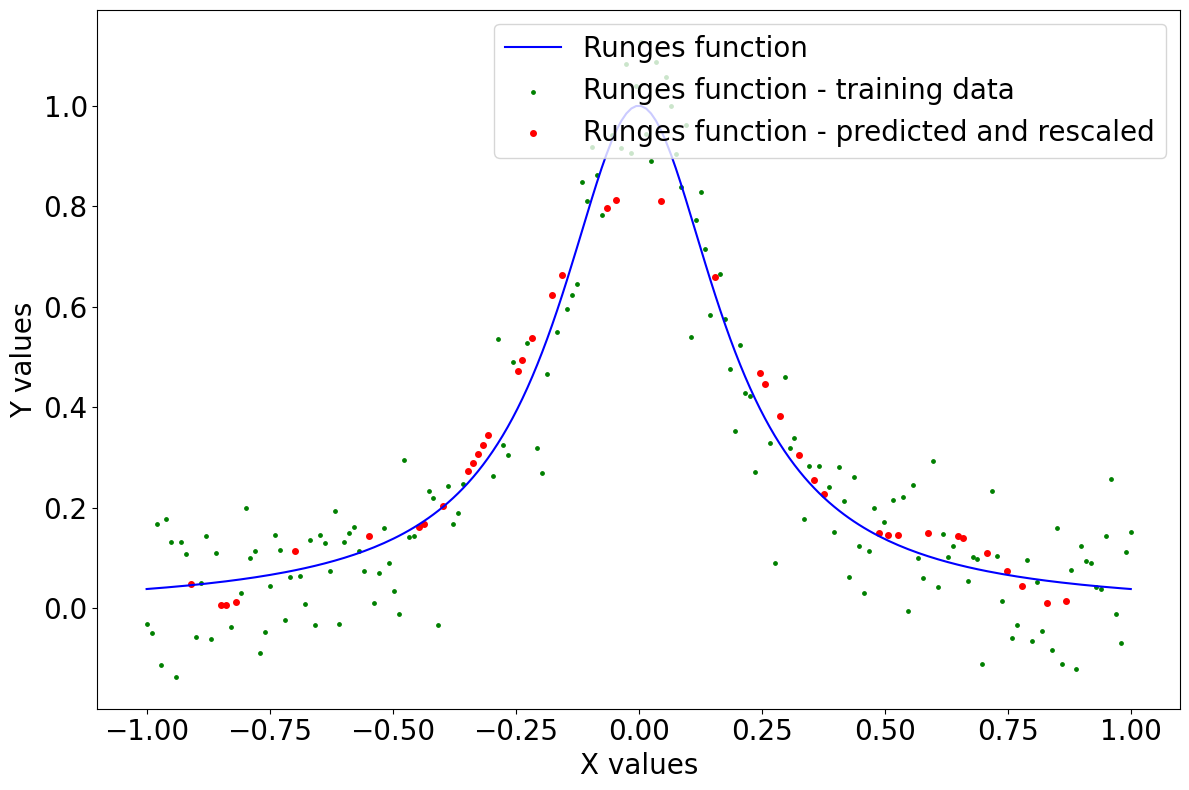

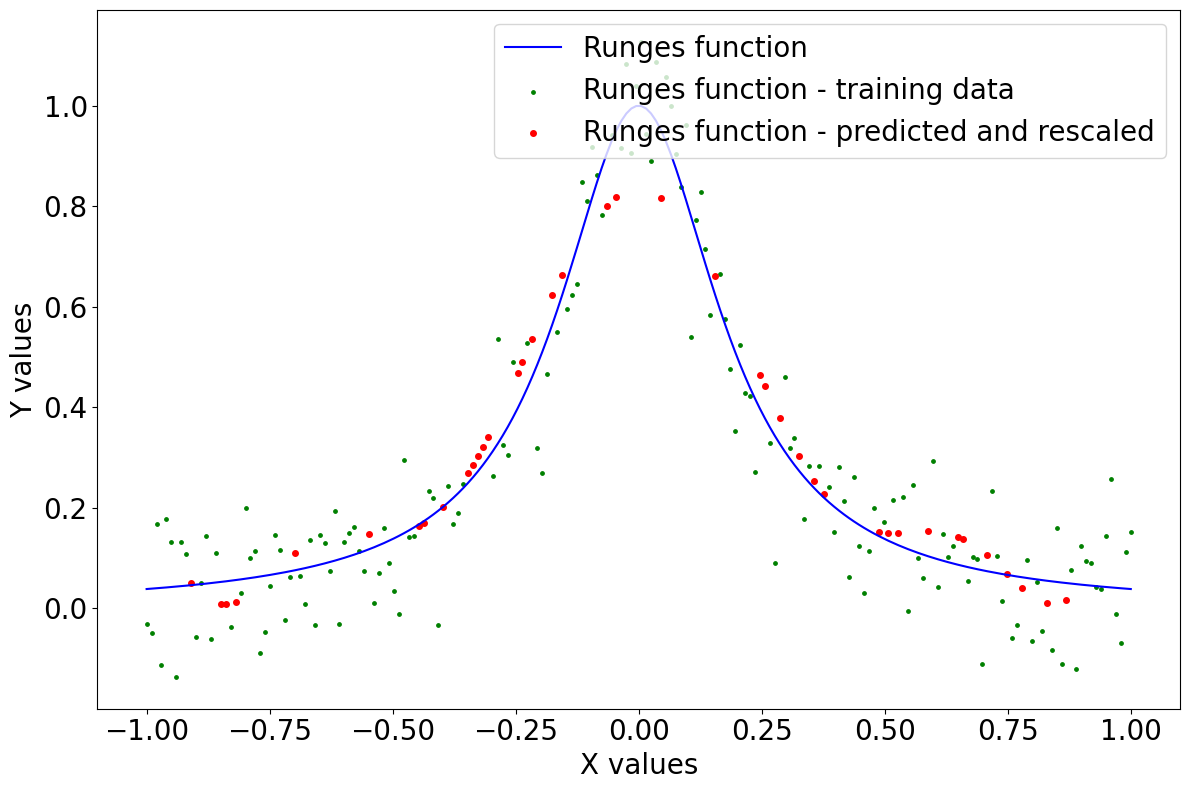

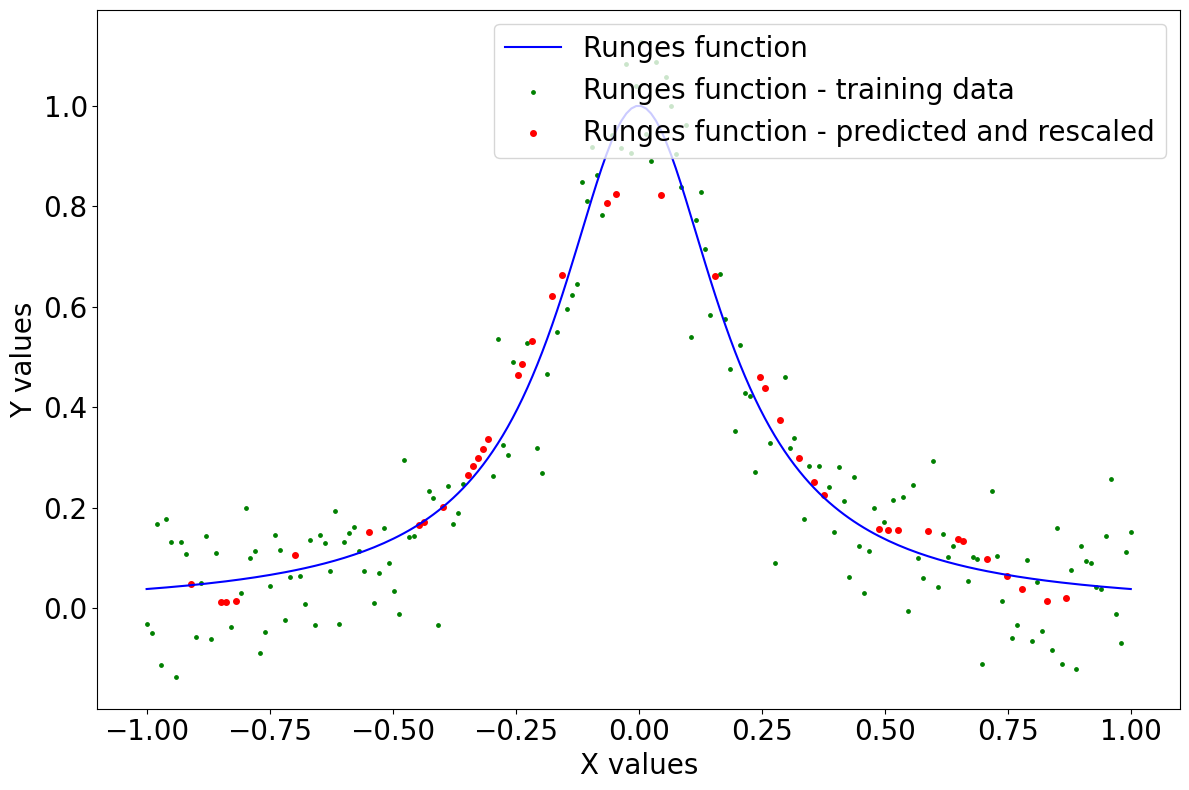

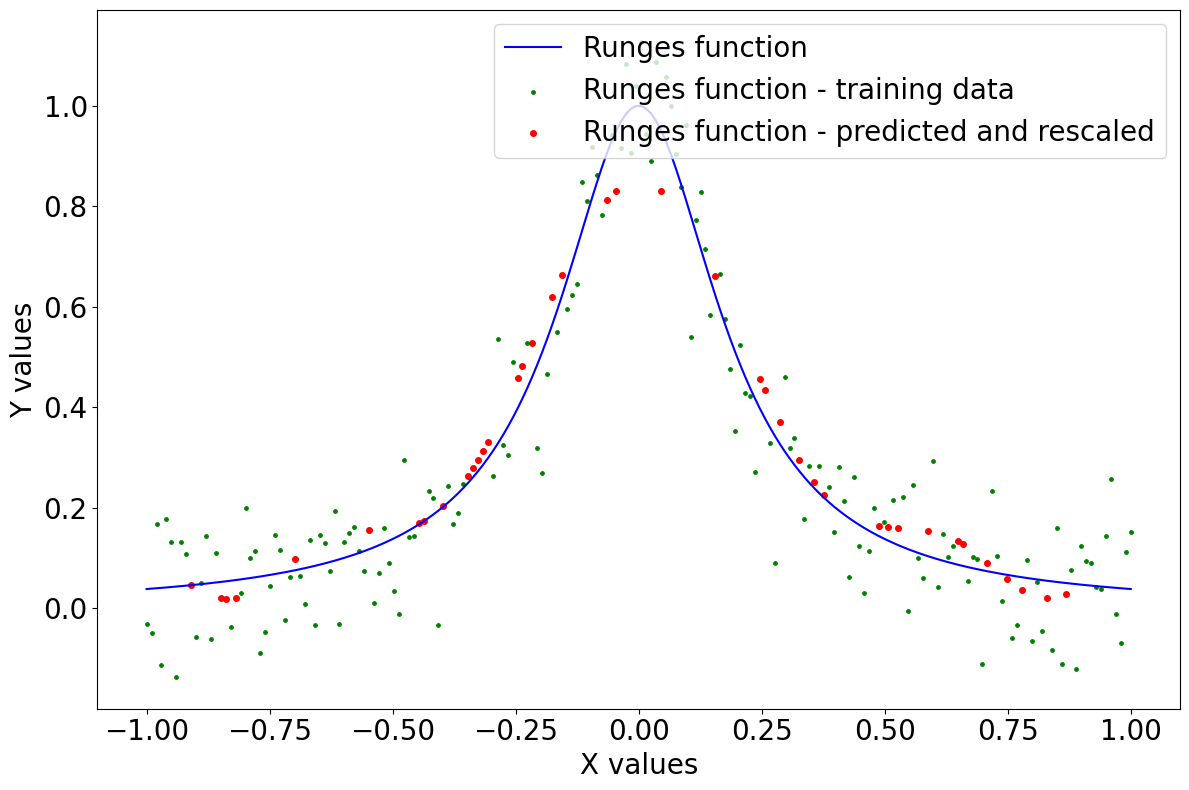

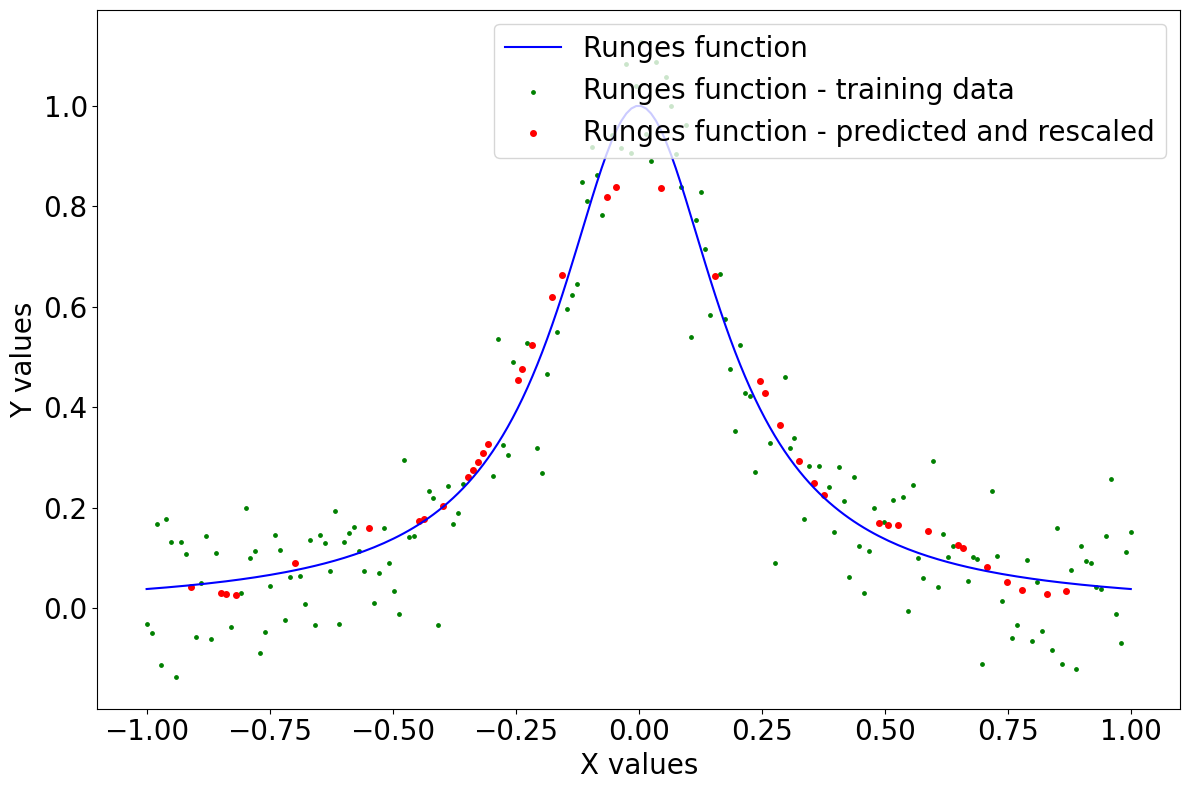

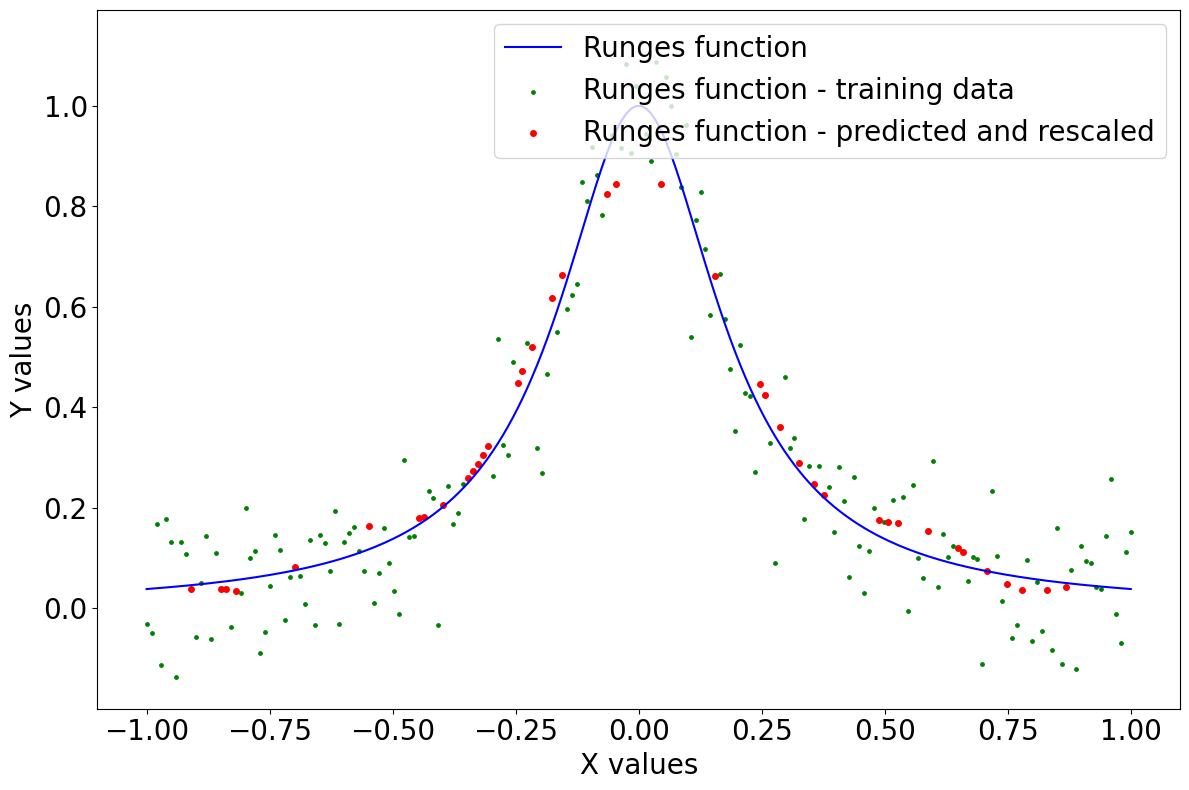

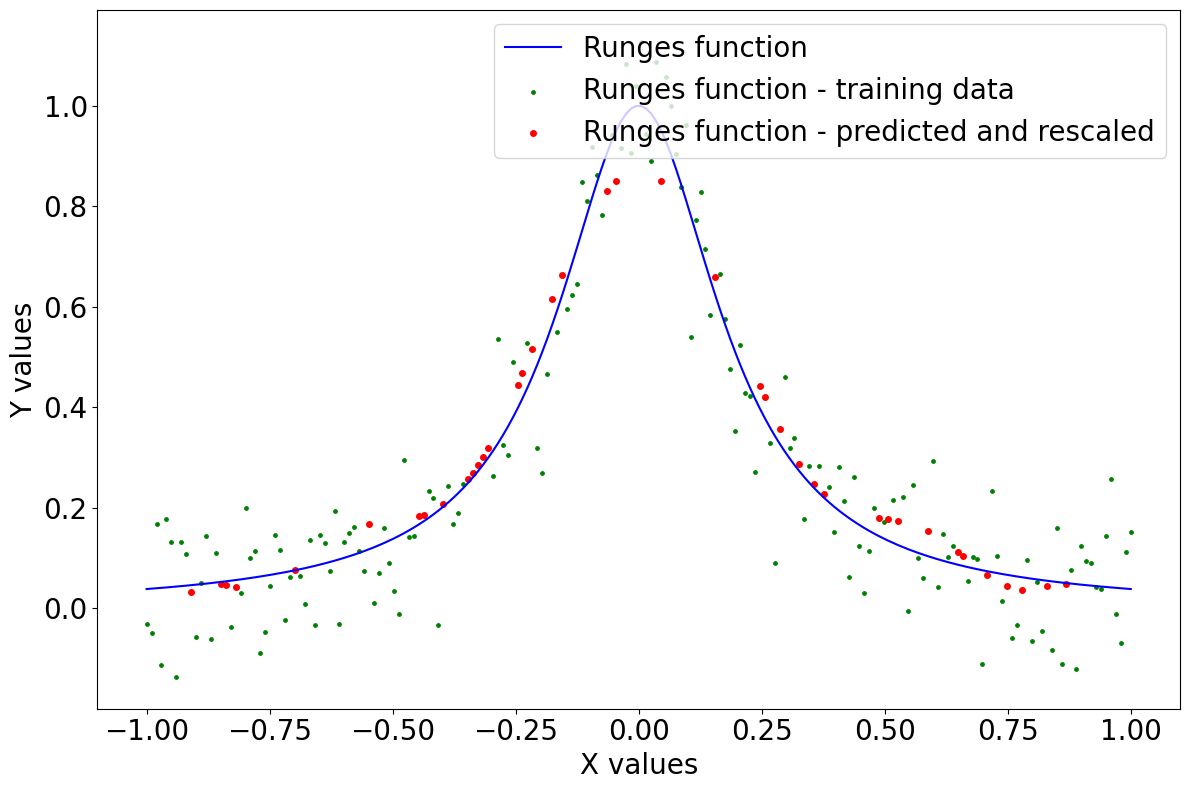

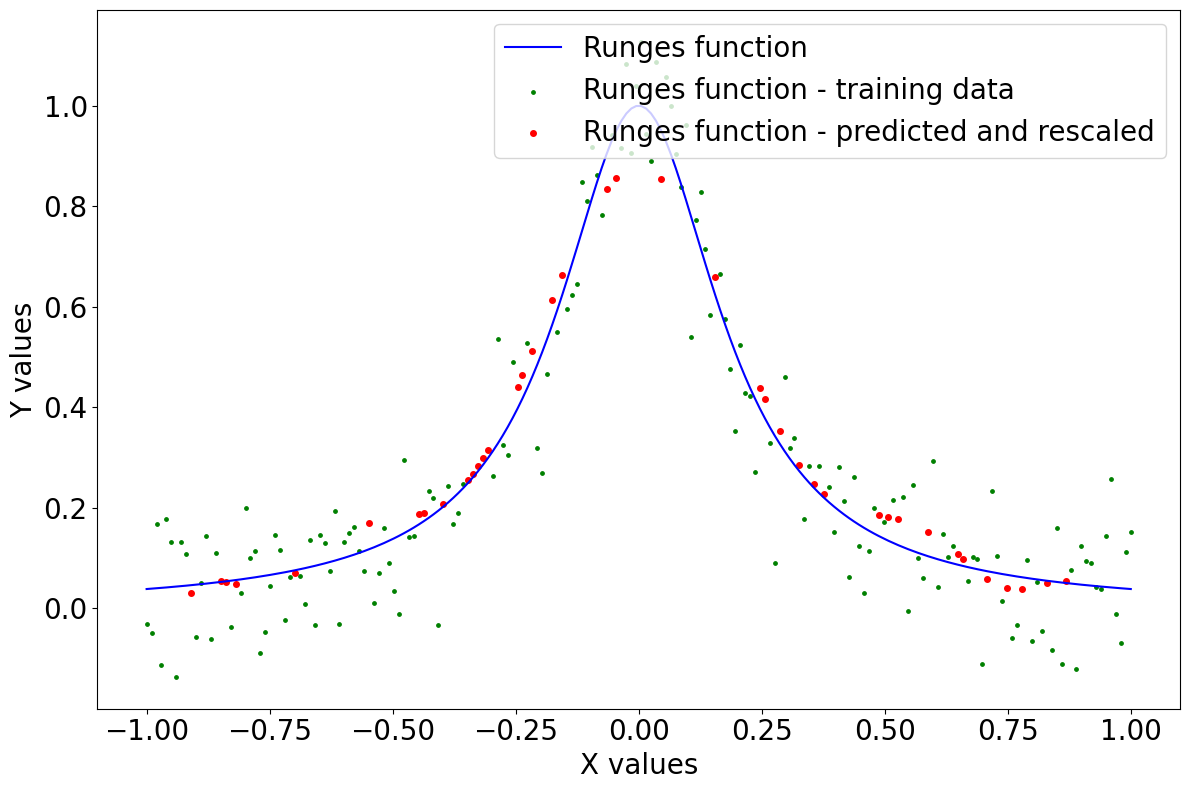

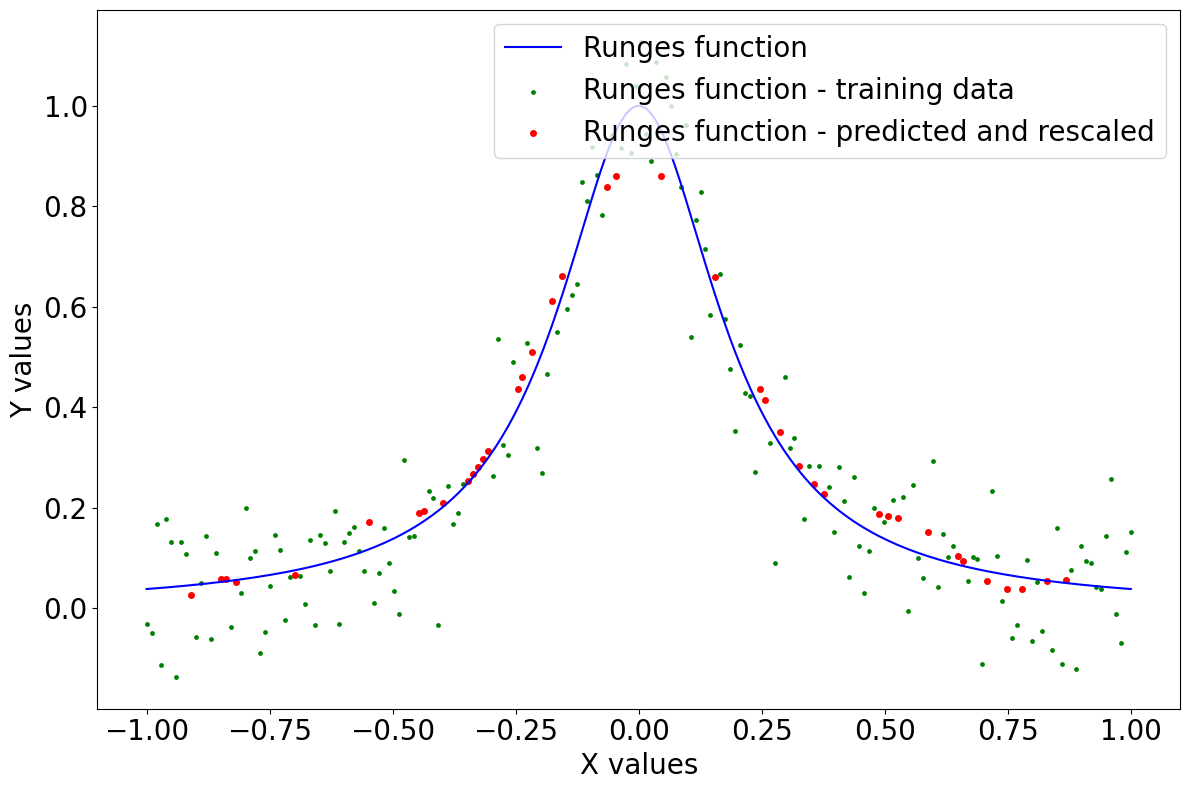

In [39]:
if create_plots:
    # for plotting ridge dependent on different lambda values, rescaled coef and intercept also as qc
    for i, theta in enumerate(thetas_ridge):
        rescaled_coef_ridge, rescaled_intercept_ridge = rescale_theta_intercept(theta[1:], theta[0], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)
        y_predicted_scaled_ridge = predict_y(X_test_scaled[:, 1:], rescaled_coef_ridge)
        y_predicted_rescaled_ridge = rescale_y(y_predicted_scaled_ridge, y_train_std, y_train_mean)
        plot_xy_xynoise_ypredicted(x, y, x_train_noise, y_train_noise, y_predicted_rescaled_ridge, x_test, n_datapoints, "Ridge", p, False, lambda_n, lambdas[i], 0, max_iterations)

#### Explore Ridge regression in regards to lambda values, with noise

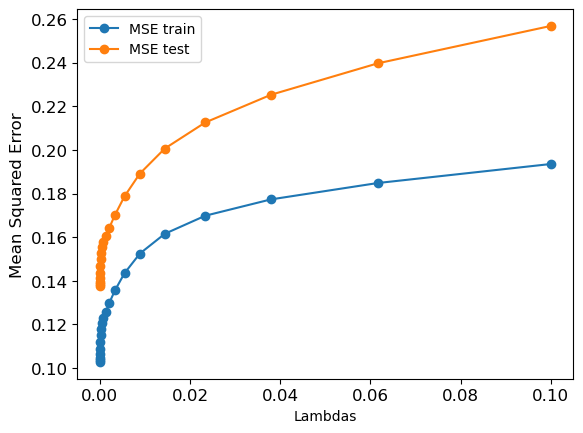

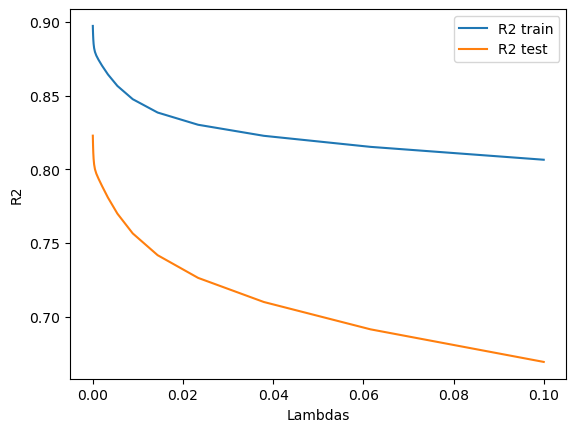

In [40]:
# Explore lambdas with Ridge regression - noise
mse_train_ridge, mse_test_ridge, r2_train_ridge, r2_test_ridge, thetas_ridge_noise = explore_lambda(X_train_scaled_noise, X_test_scaled_noise, y_train_scaled_noise, y_test_scaled_noise, lambdas_start, verbose=verbose_bool)

if create_plots:
    plot_mse("Ridge", p, n_datapoints, lambdas_start, mse_train_ridge, mse_test_ridge, noise=True)
    plot_r2("Ridge", p, n_datapoints, lambdas_start, r2_train_ridge, r2_test_ridge, noise=True)


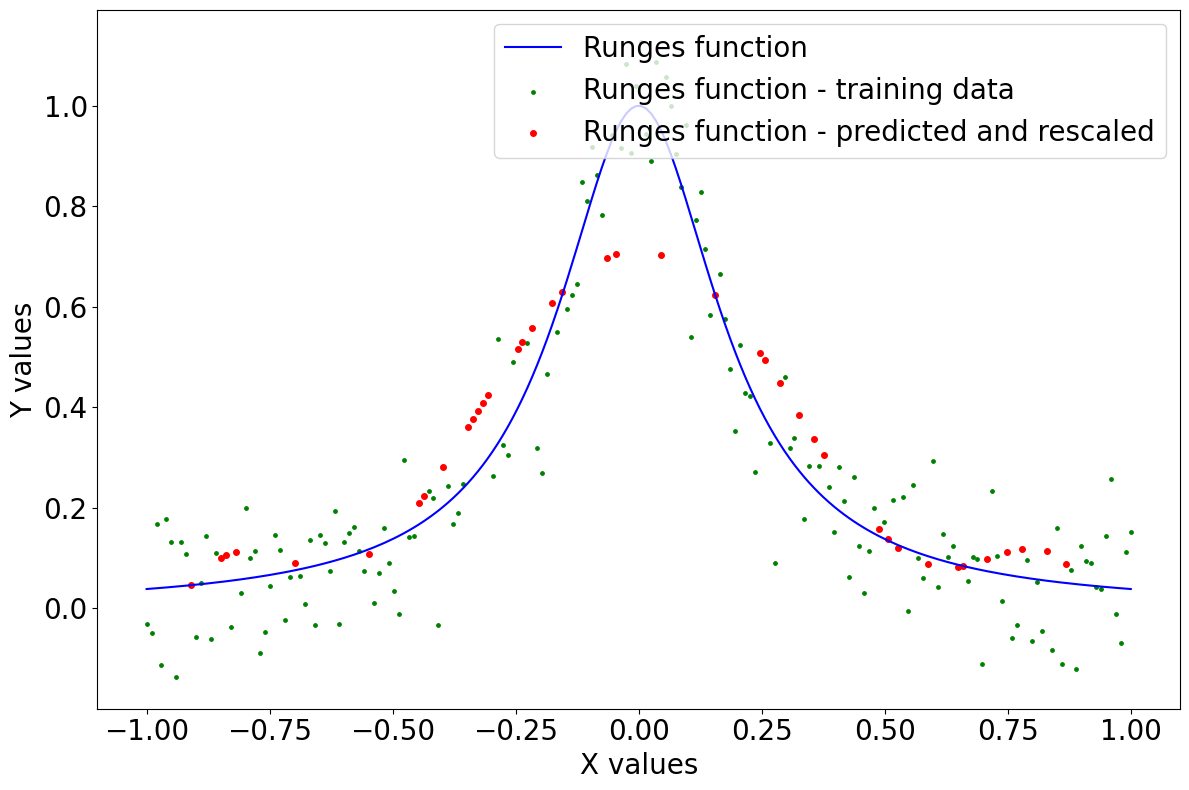

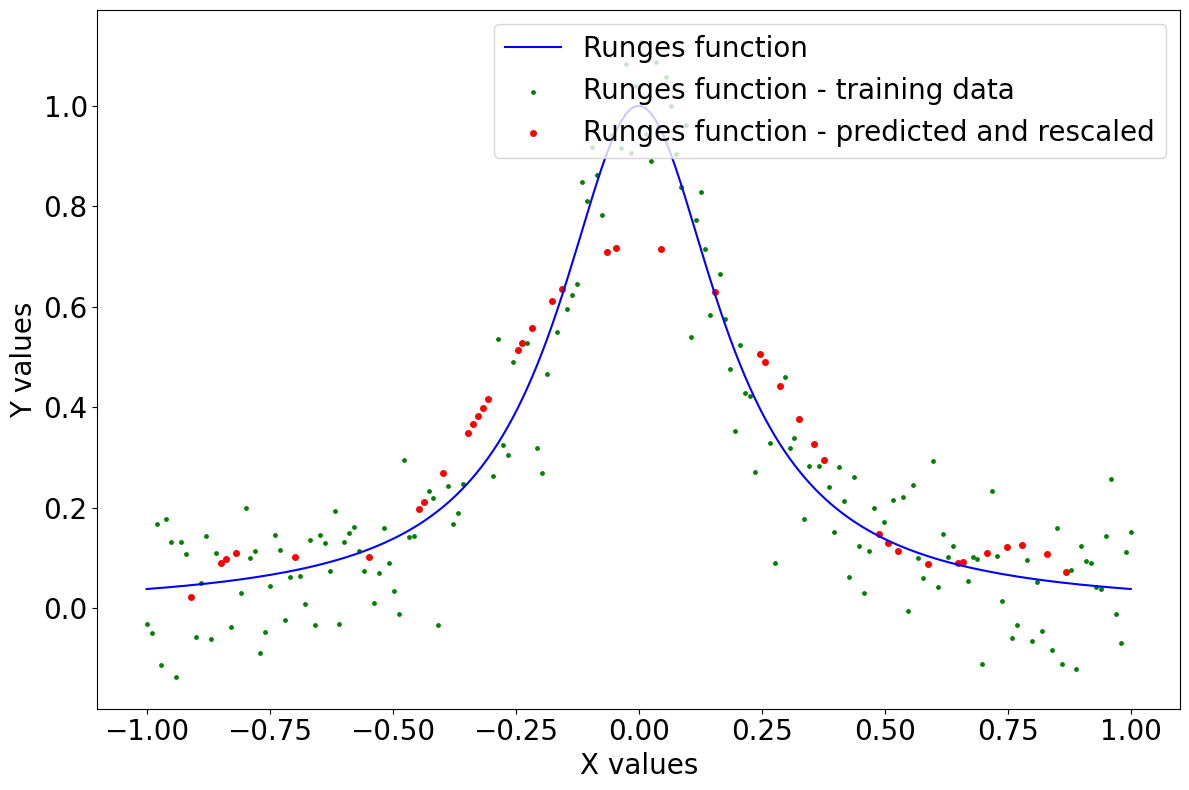

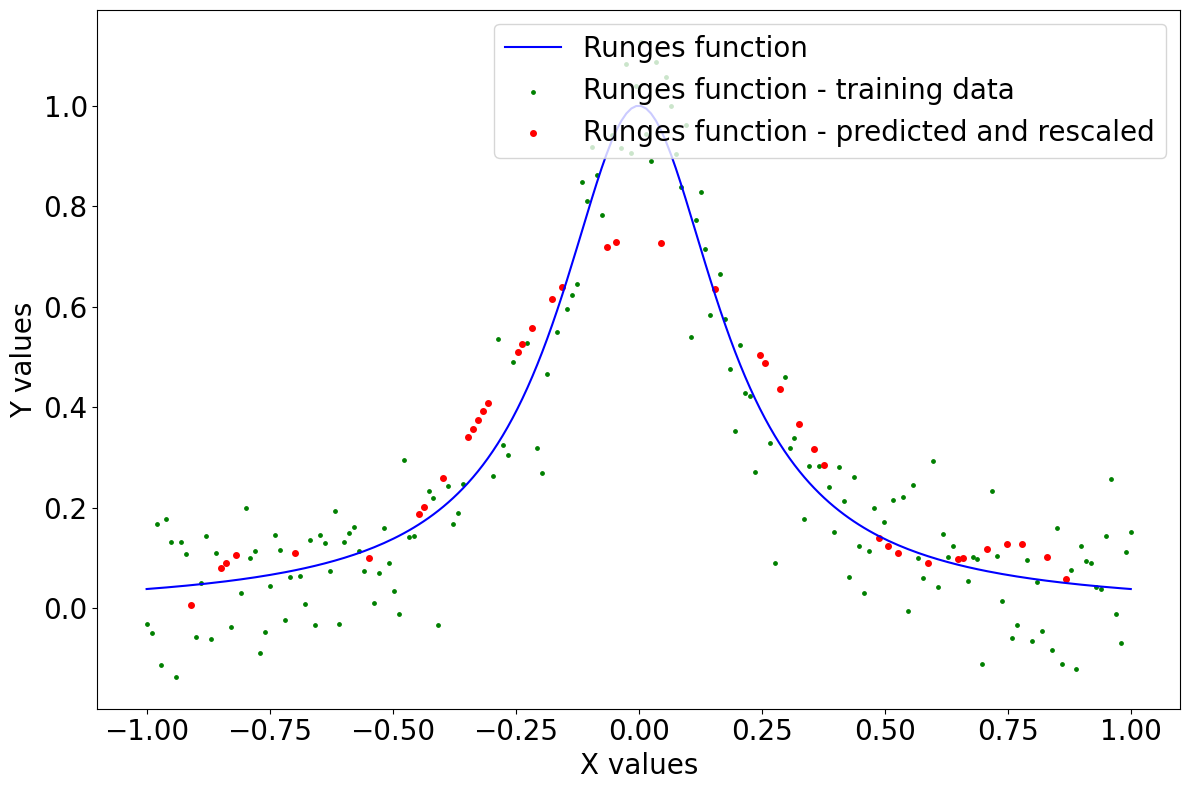

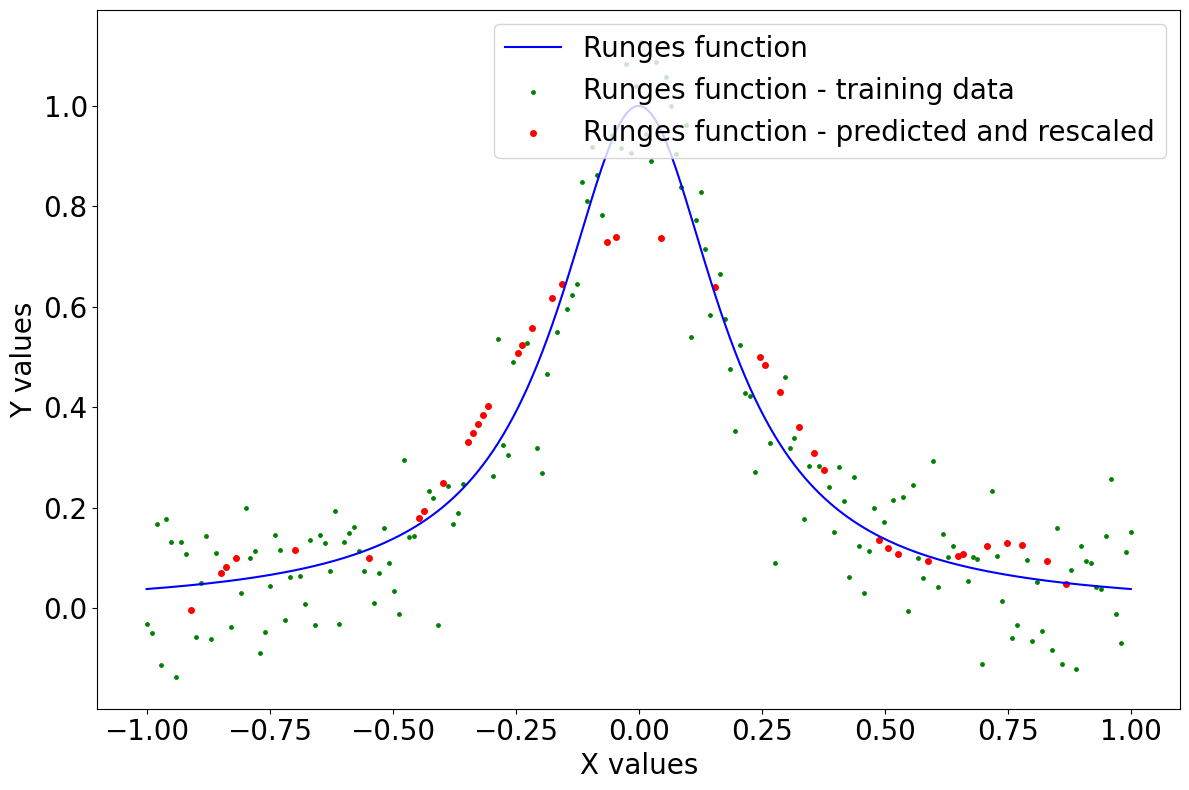

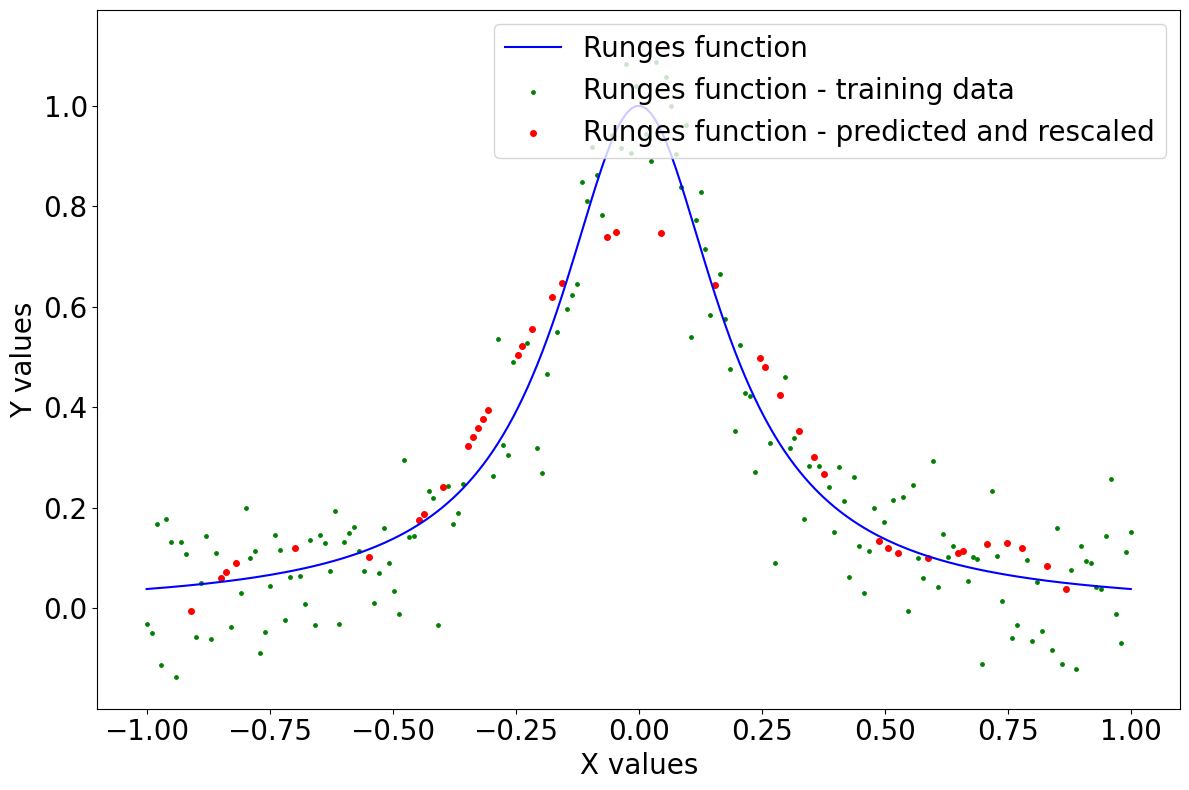

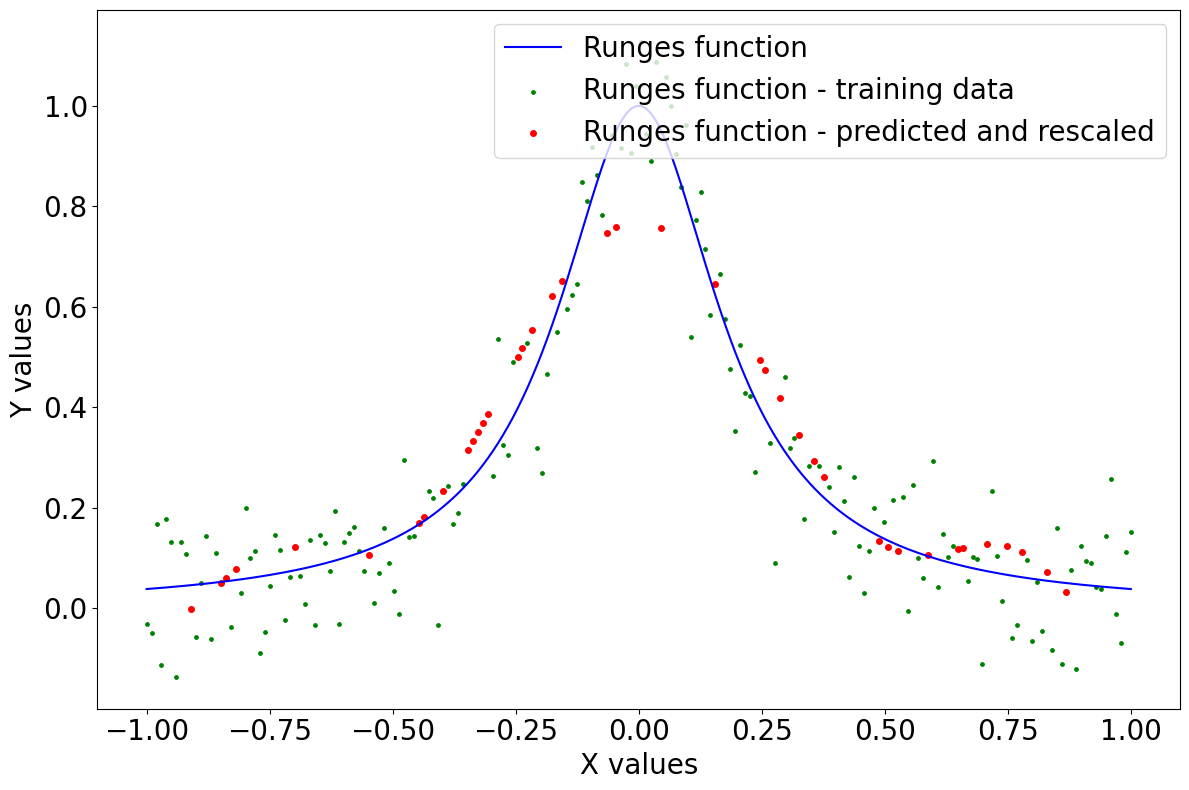

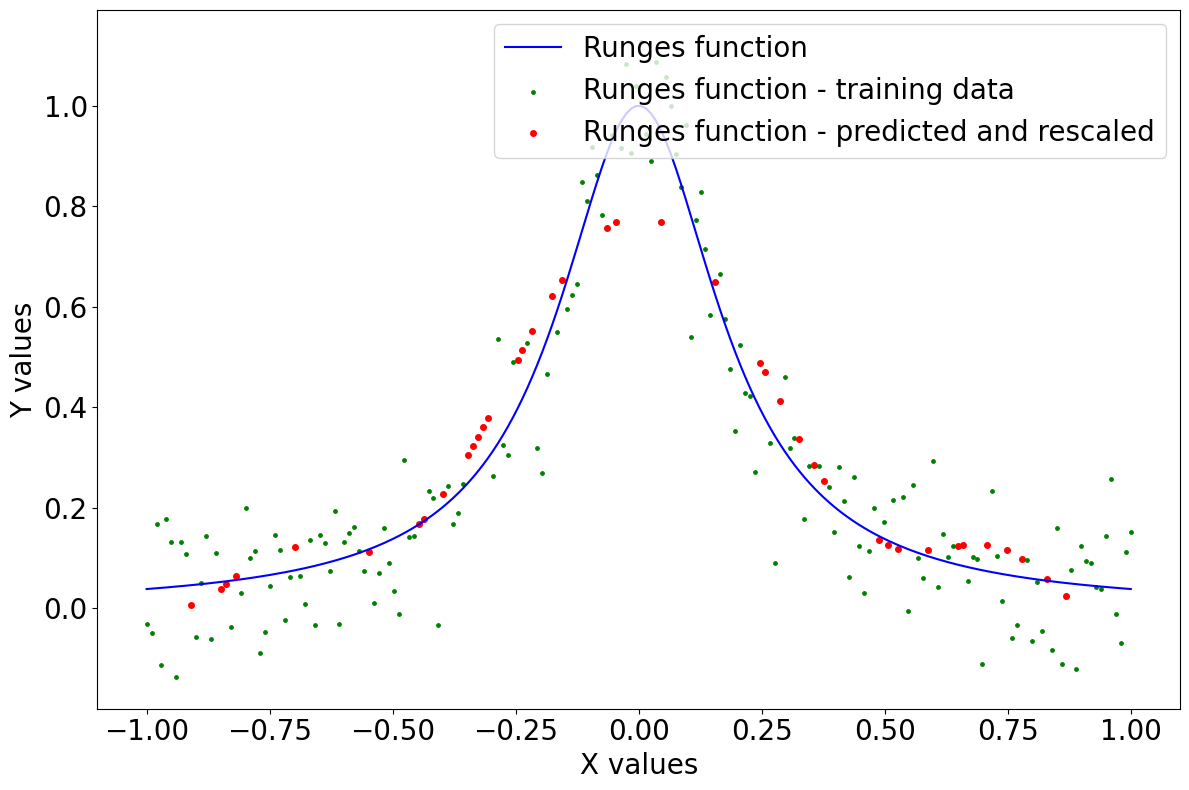

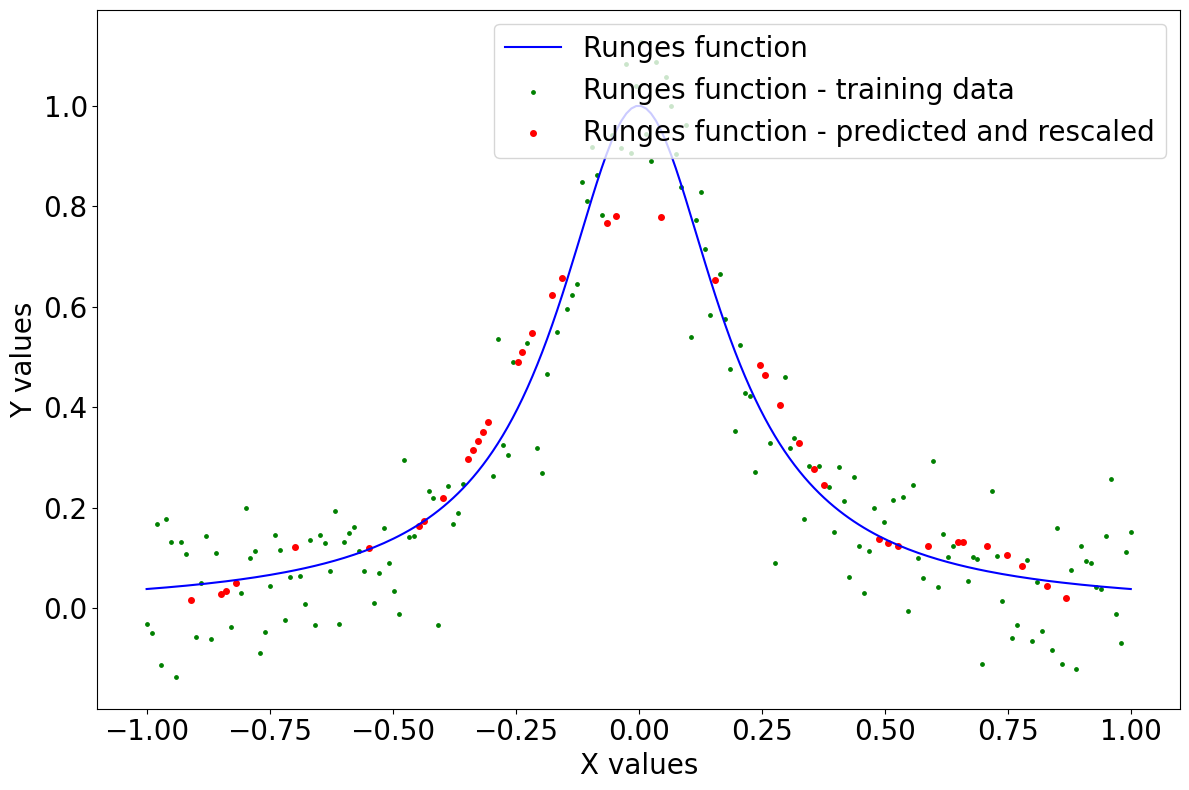

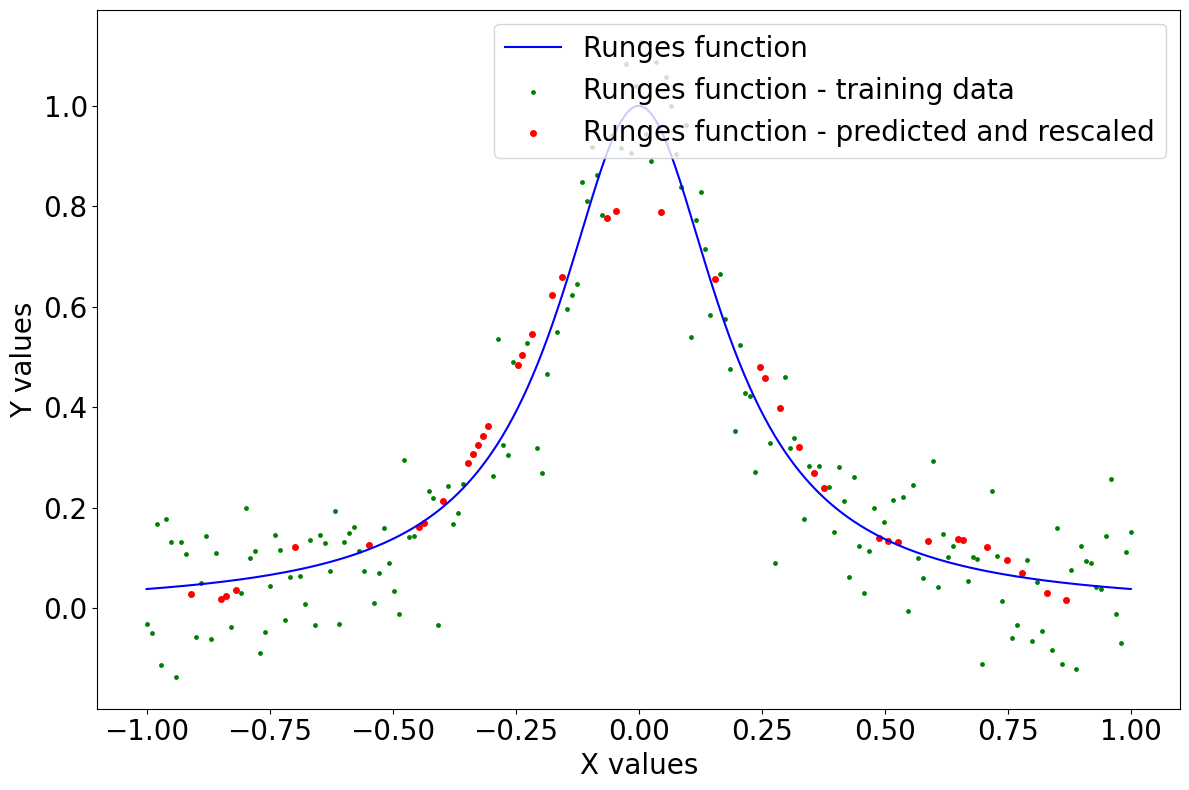

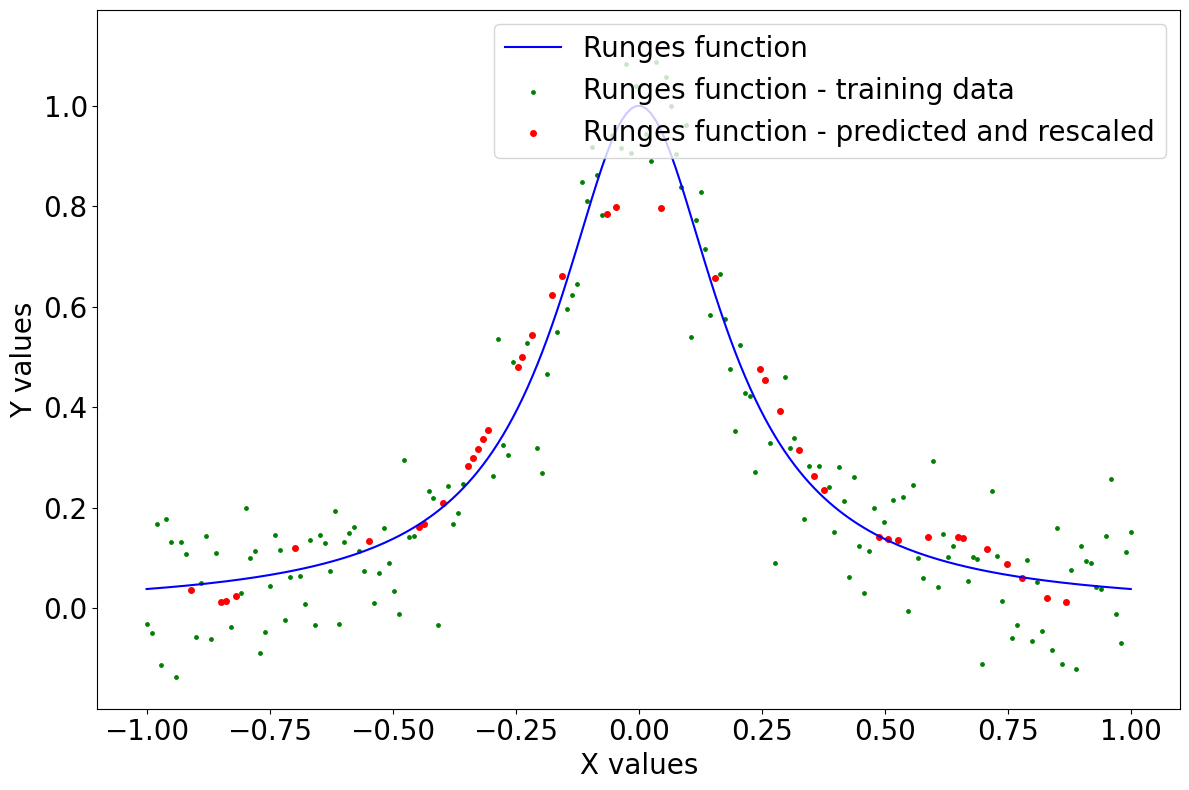

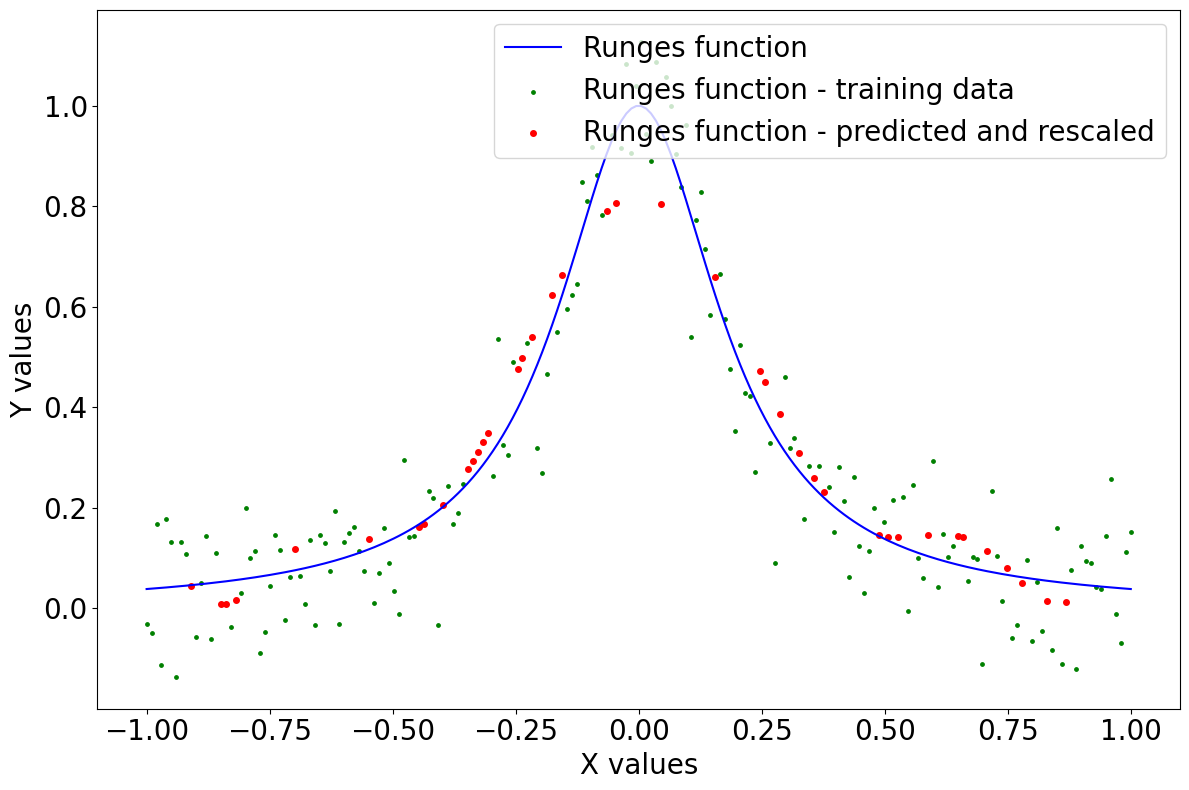

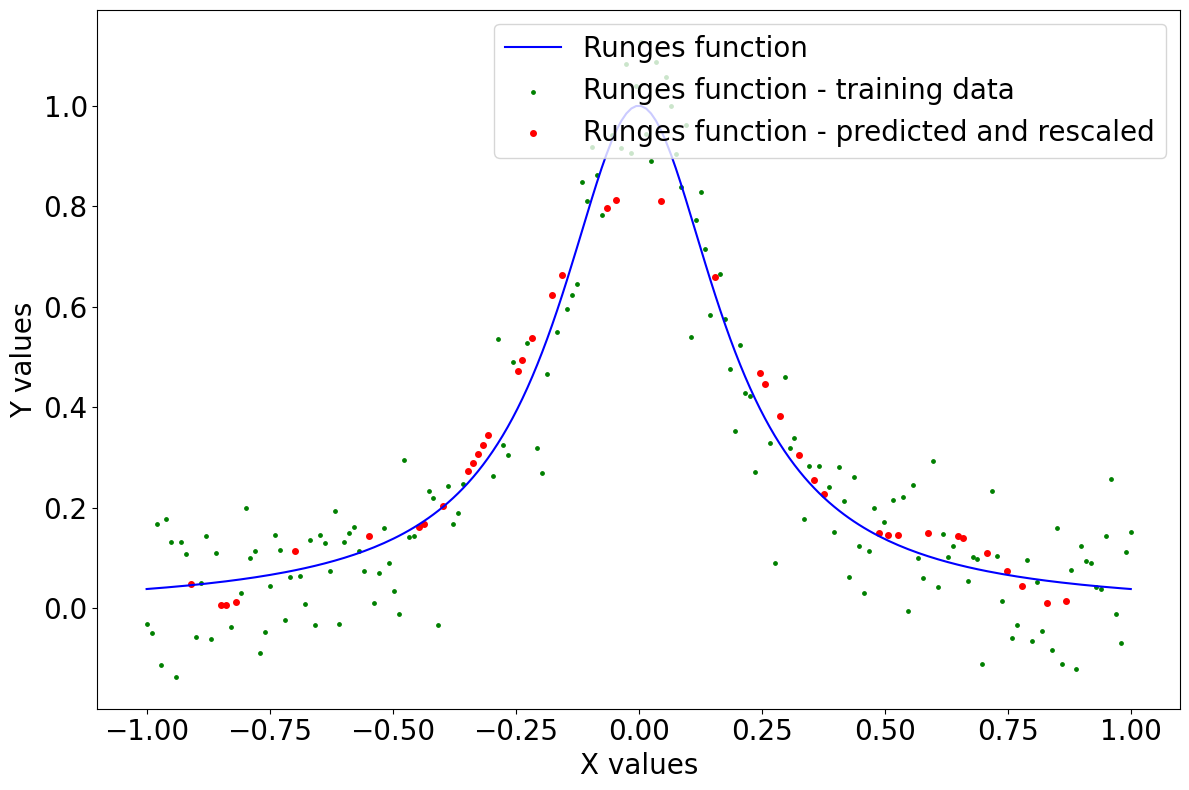

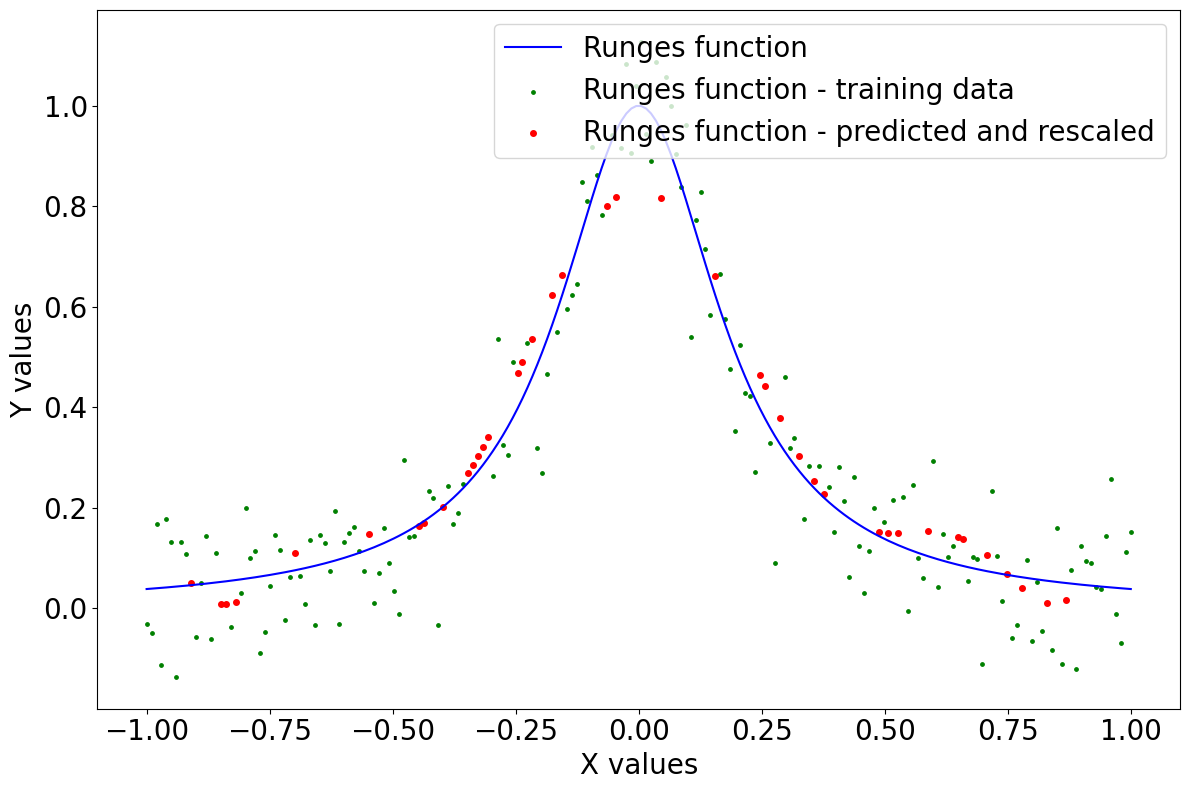

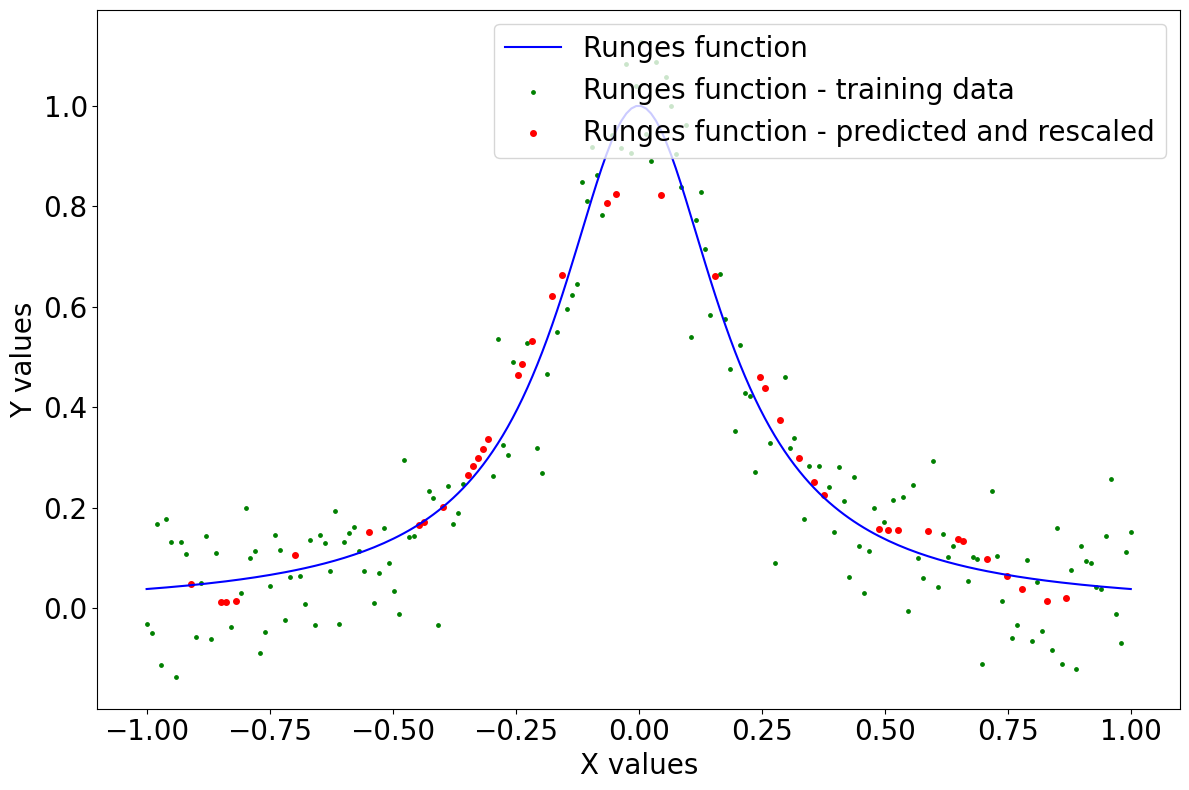

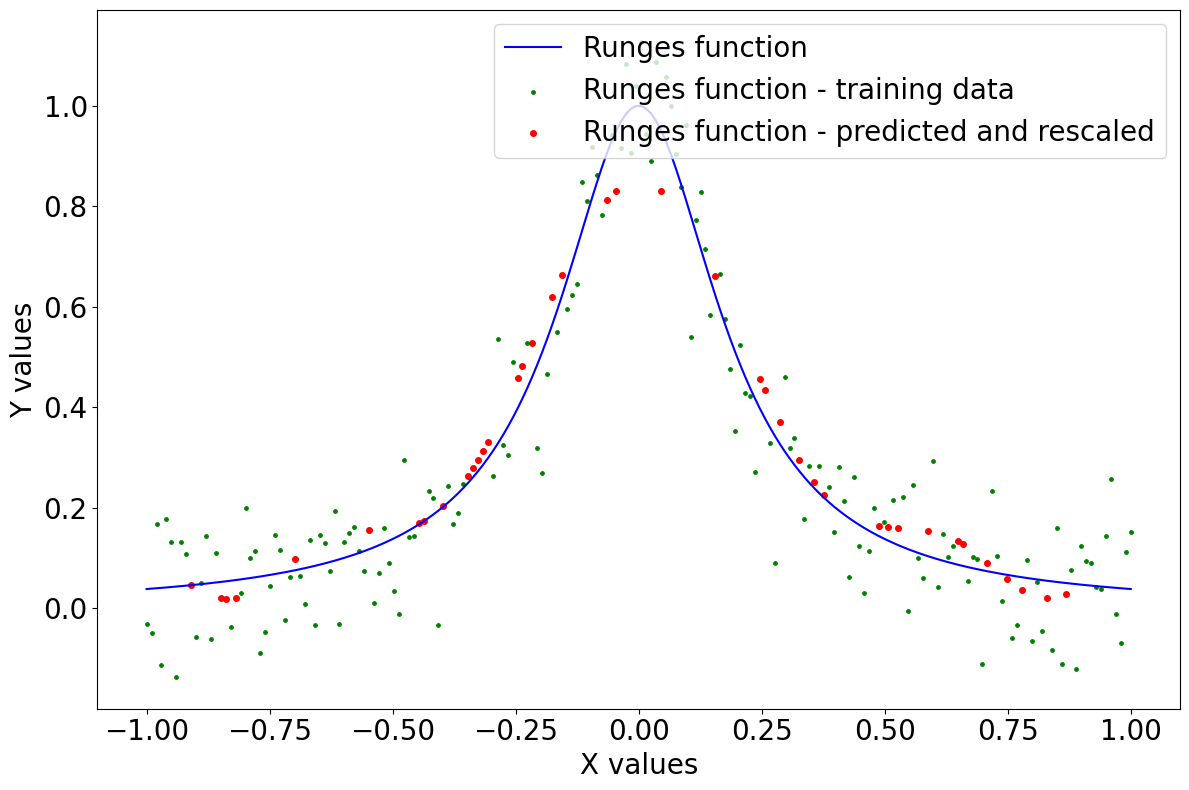

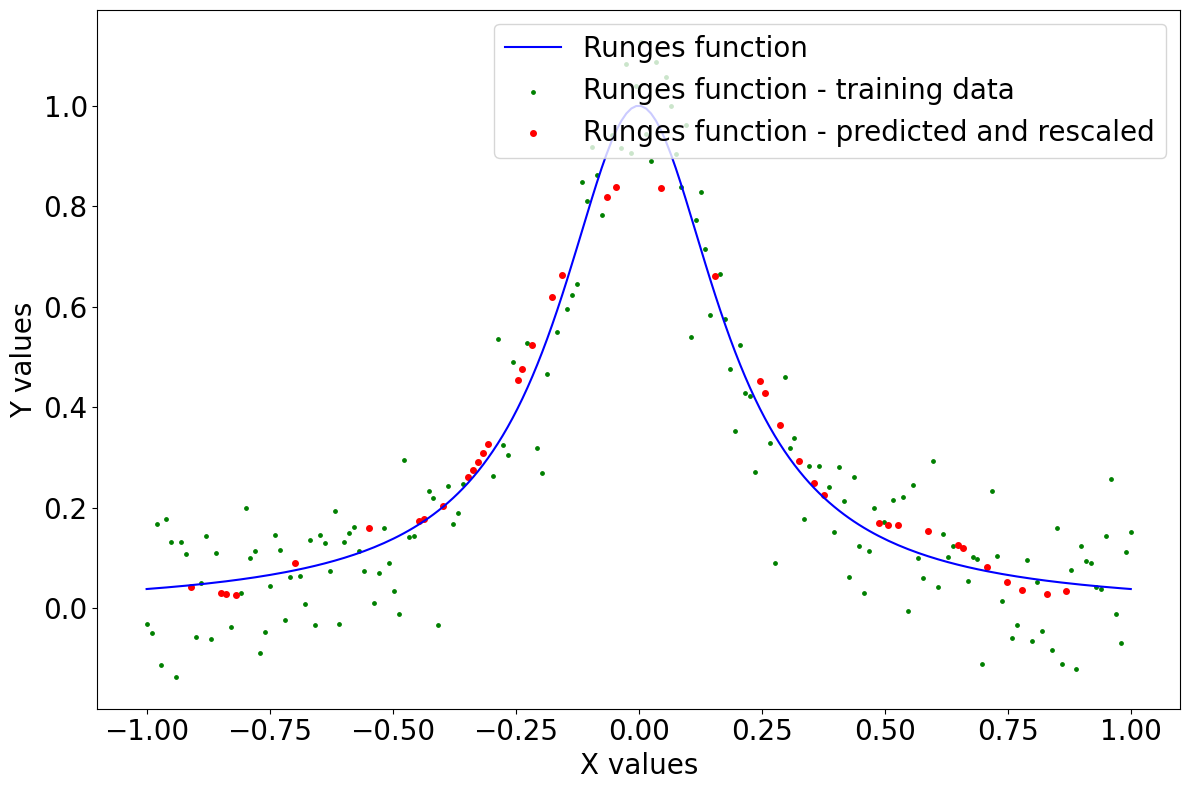

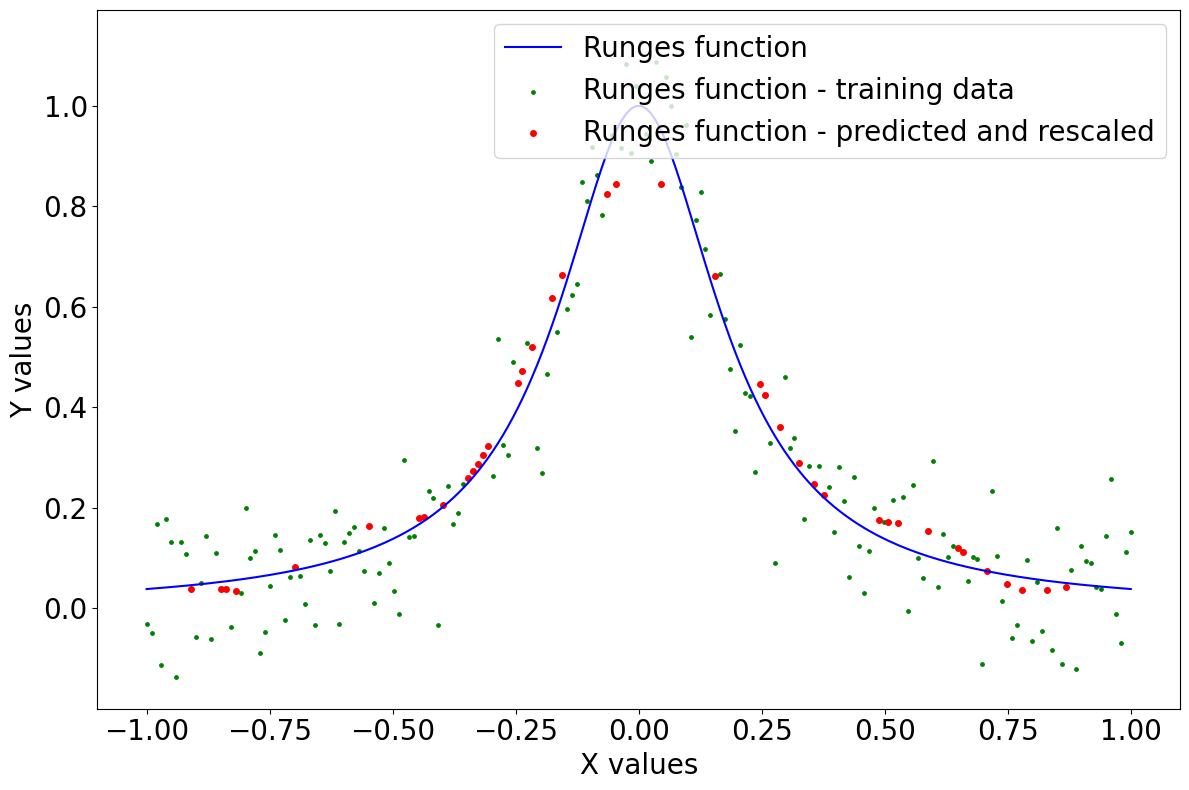

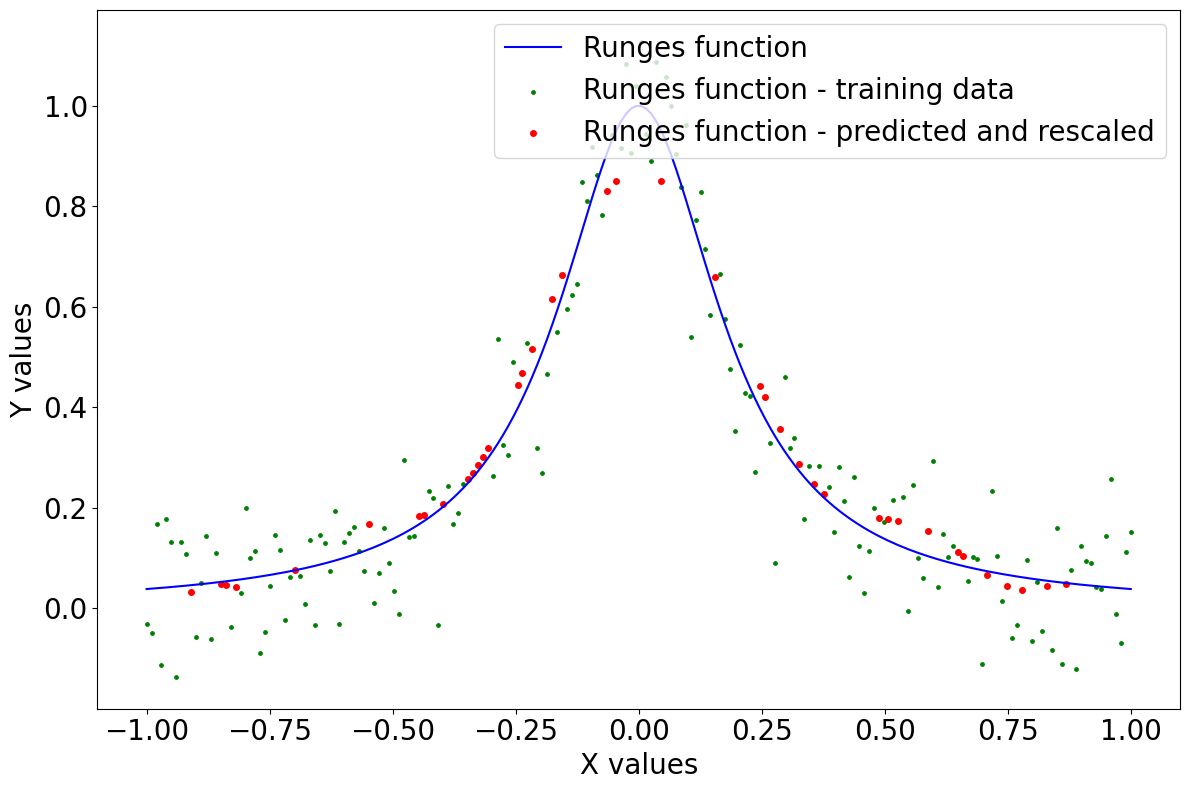

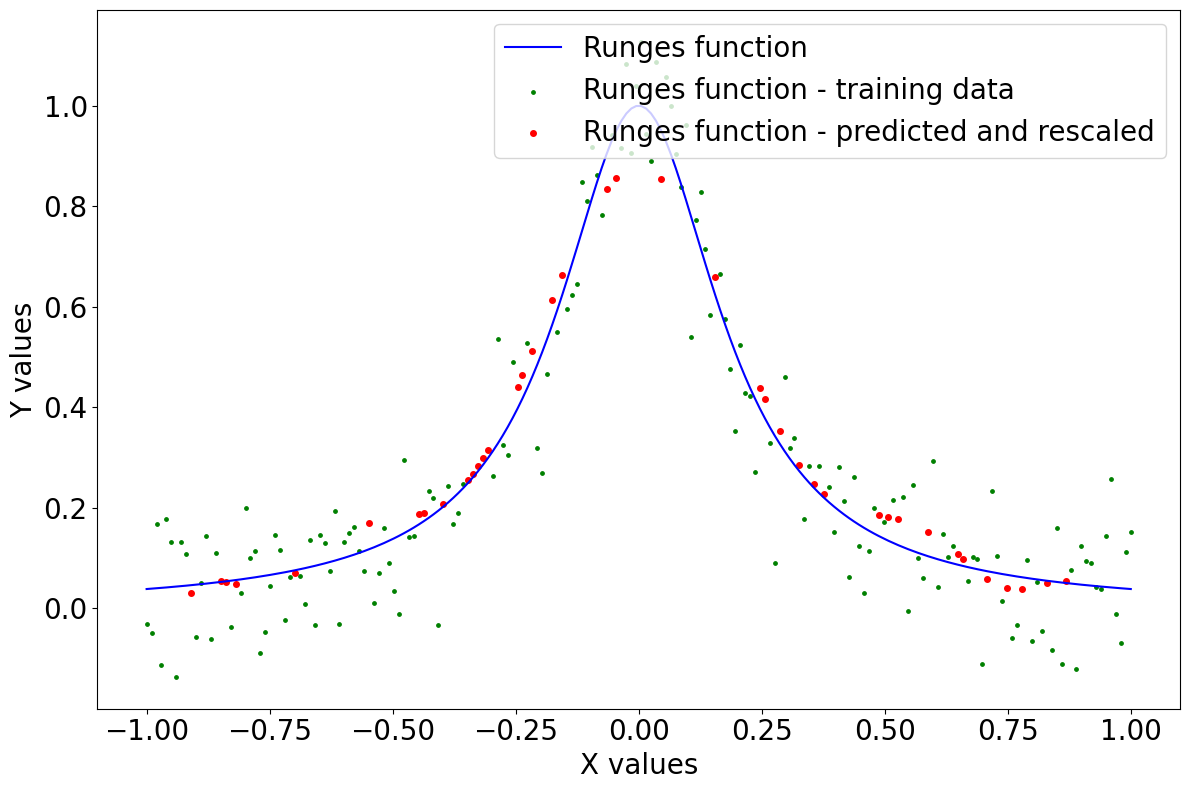

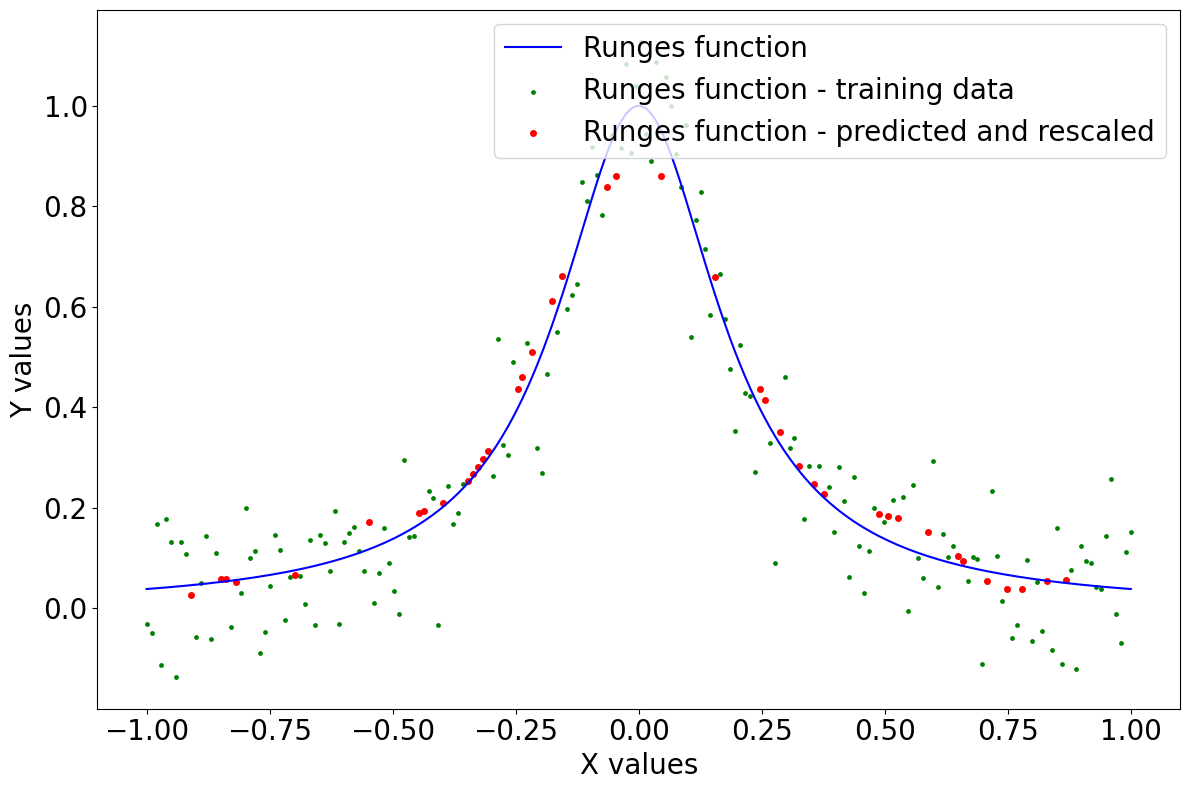

In [41]:
if create_plots:
    # for plotting ridge dependent on different lambda values, rescaled coef and intercept also as qc
    for i, theta in enumerate(theta_ridge):
        rescaled_coef_ridge_noise, rescaled_intercept_ridge_noise = rescale_theta_intercept(theta[1:], theta[0], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)
        y_predicted_scaled_ridge_noise = predict_y(X_test_scaled[:, 1:], rescaled_coef_ridge_noise)
        y_predicted_rescaled_ridge_noise = rescale_y(y_predicted_scaled_ridge_noise, y_train_std, y_train_mean)
        plot_xy_xynoise_ypredicted(x, y, x_train_noise, y_train_noise, y_predicted_rescaled_ridge_noise, x_test, n_datapoints, "Ridge", p, False, lambda_n, lambdas[i], 0, max_iterations)

In [42]:
# OLS regression. MSE as function of data points
datapoints = np.array([50, 100, 200, 300, 500, 750, 1000])


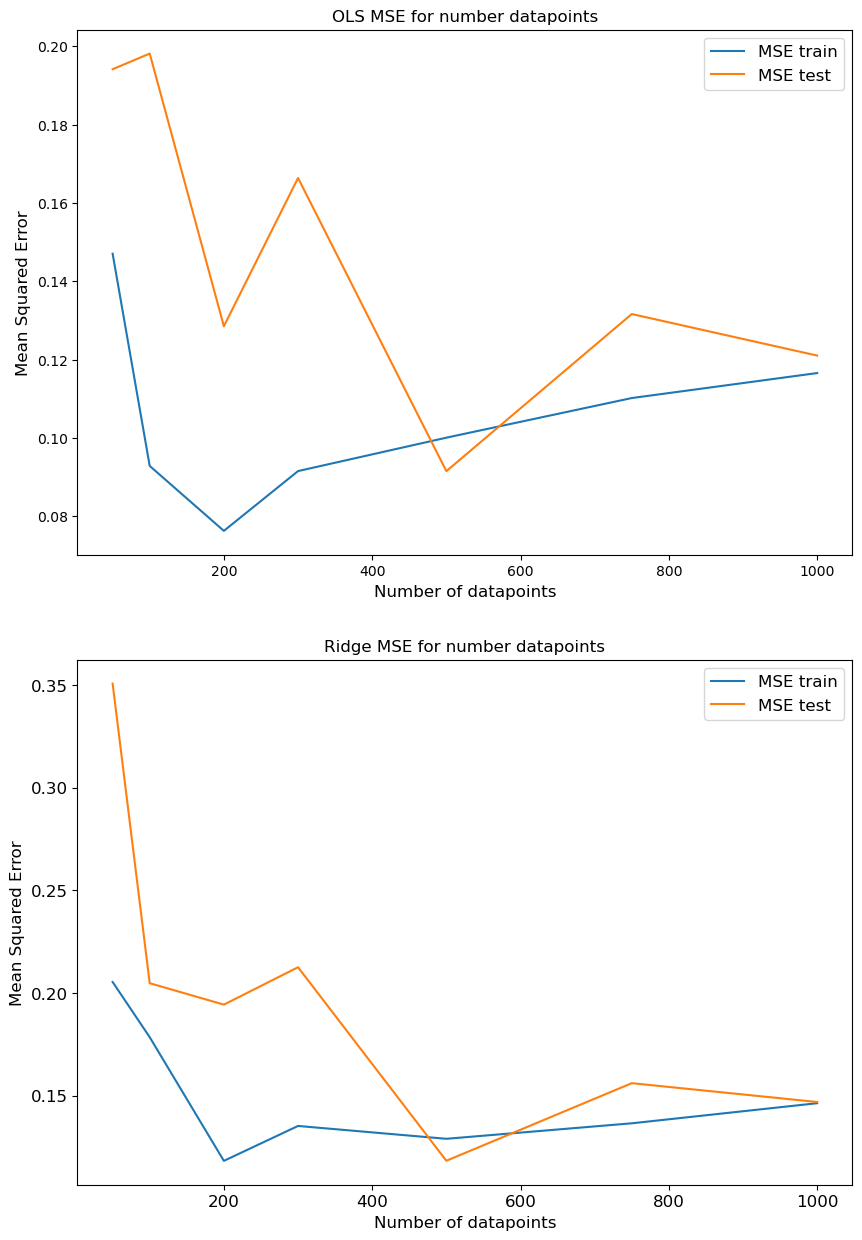

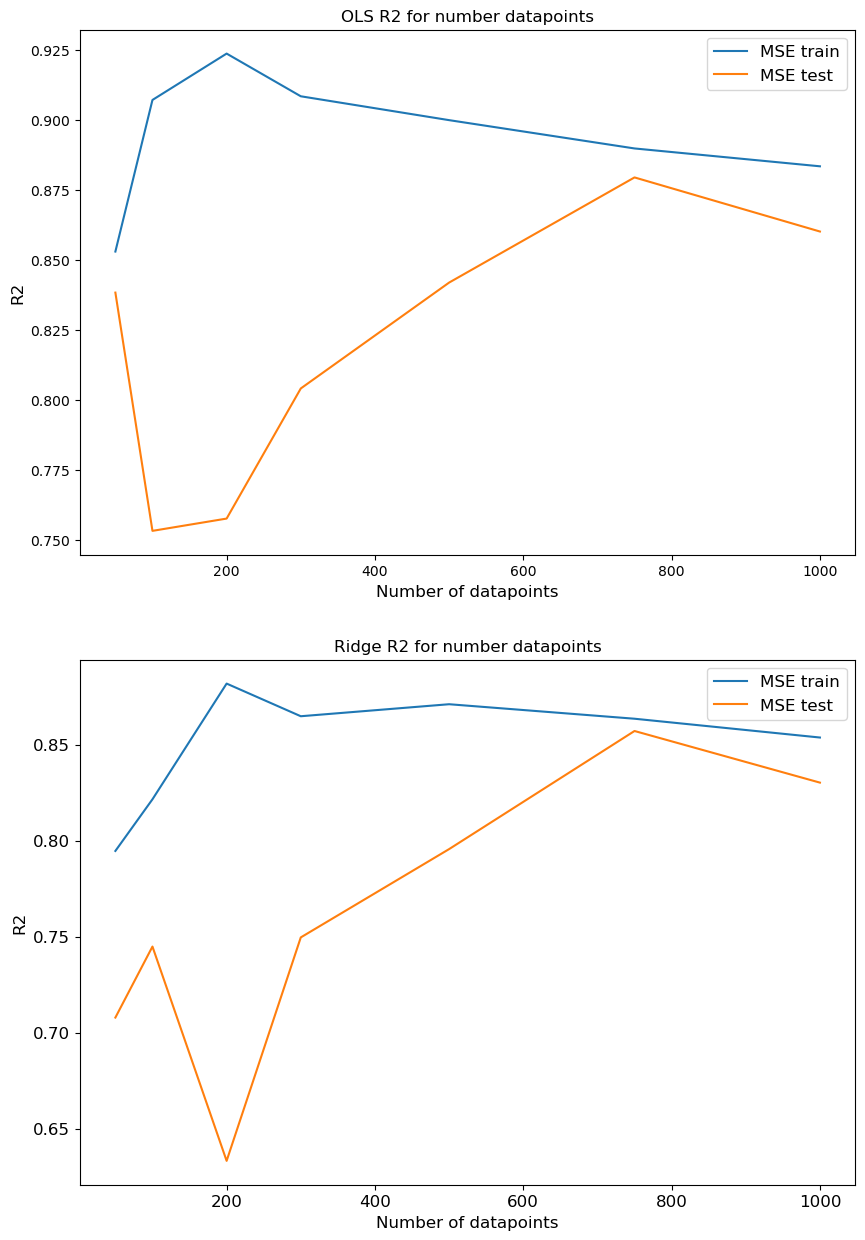

"\nplt.plot(datapoints, r2_train_by_datapints, label='R2 train')\nplt.plot(datapoints, r2_test_by_datapints, label='R2 test')\n#plt.plot(x_axis_data, mse_test, label='MSE test')\nplt.xlabel('Number of datapoints', fontsize=12)\nplt.ylabel('Mean Squared Error', fontsize=12)\nplt.legend(fontsize=12)\n\n# Ensure tick labels also have fontsize=12\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=12)\n\nplt.savefig('OLS MSE vs datapoints.png', bbox_inches='tight')\nplt.show()\nplt.close()\n\n"

In [45]:
mse_train_by_datapints_OLS = []
mse_test_by_datapints_OLS = []

r2_train_by_datapints_OLS = []
r2_test_by_datapints_OLS = []

mse_train_by_datapints_Ridge = []
mse_test_by_datapints_Ridge = []

r2_train_by_datapints_Ridge = []
r2_test_by_datapints_Ridge = []

for n in datapoints:
    # generating data with noise
    x_noise = np.linspace(-1, 1, num=n)
    y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n)

    # creating design matrix with polynomial features: p
    X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

    # test and train dataset, and scaling of X_train and X_test
    x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_noise, y_noise, test_size=0.2, random_state=random_state_int)
    X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state = random_state_int)
    X_train_scaled_noise, X_test_scaled_noise, X_mean, X_std = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
    # scaling of y_train and y_test
    y_train_scaled_noise, y_test_scaled_noise, y_train_mean_noise, y_train_std_noise = standard_scaler(y_train_noise, y_test_noise)

    ### OLS
    #X_train_scaled_noise, X_test_scaled_noise, y_train_scaled_noise, y_test_scaled_noise
    # scaled data for features as input
    theta_OLS = OLS_parameters(X_train_scaled_noise, y_train_scaled_noise)
    theta_Ridge = Ridge_parameters(X_train_scaled_noise,y_train_scaled_noise,lam)


    y_tilde_train_OLS = X_train_scaled_noise @ theta_OLS
    y_tilde_test_OLS = X_test_scaled_noise @ theta_OLS
    y_tilde_train_Ridge = X_train_scaled_noise @ theta_Ridge
    y_tilde_test_Ridge = X_test_scaled_noise @ theta_Ridge

    # Calculate MSE for training and test data
    mse_train_OLS = MSE(y_train_scaled_noise, y_tilde_train_OLS)
    mse_test_OLS = MSE(y_test_scaled_noise, y_tilde_test_OLS)

    mse_train_Ridge = MSE(y_train_scaled_noise, y_tilde_train_Ridge)
    mse_test_Ridge = MSE(y_test_scaled_noise, y_tilde_test_Ridge)
    
    mse_train_by_datapints_OLS.append(mse_train_OLS)
    mse_test_by_datapints_OLS.append(mse_test_OLS)

    mse_train_by_datapints_Ridge.append(mse_train_Ridge)
    mse_test_by_datapints_Ridge.append(mse_test_Ridge)

    # Calculate R2 for training and test data
    r2_train_OLS = R2(y_train_scaled_noise, y_tilde_train_OLS)
    r2_test_OLS = R2(y_test_scaled_noise, y_tilde_test_OLS)

    r2_train_Ridge = R2(y_train_scaled_noise, y_tilde_train_Ridge)
    r2_test_Ridge = R2(y_test_scaled_noise, y_tilde_test_Ridge)
    
    r2_train_by_datapints_OLS.append(r2_train_OLS)
    r2_test_by_datapints_OLS.append(r2_test_OLS)

    r2_train_by_datapints_Ridge.append(r2_train_Ridge)
    r2_test_by_datapints_Ridge.append(r2_test_Ridge)
    


fig = plt.figure(figsize=(10, 15))
ax1 = plt.subplot(2,1,1)

ax1.plot(datapoints, mse_train_by_datapints_OLS, label='MSE train')
ax1.plot(datapoints, mse_test_by_datapints_OLS, label='MSE test')

ax1.set_xlabel('Number of datapoints', fontsize=12)
ax1.set_ylabel('Mean Squared Error', fontsize=12)
ax1.legend(fontsize=12)
ax1.set_title("OLS MSE for number datapoints")

ax2 = plt.subplot(2,1,2)
ax2.plot(datapoints, mse_train_by_datapints_Ridge, label='MSE train')
ax2.plot(datapoints, mse_test_by_datapints_Ridge, label='MSE test')

ax2.set_xlabel('Number of datapoints', fontsize=12)
ax2.set_ylabel('Mean Squared Error', fontsize=12)
ax2.legend(fontsize=12)
ax2.set_title("Ridge MSE for number datapoints")

# Ensure tick labels also have fontsize=12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('OLS ridge MSE vs datapoints.png', bbox_inches='tight')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 15))
ax1 = plt.subplot(2,1,1)

ax1.plot(datapoints, r2_train_by_datapints_OLS, label='MSE train')
ax1.plot(datapoints, r2_test_by_datapints_OLS, label='MSE test')

ax1.set_xlabel('Number of datapoints', fontsize=12)
ax1.set_ylabel('R2', fontsize=12)
ax1.legend(fontsize=12)
ax1.set_title("OLS R2 for number datapoints")

ax2 = plt.subplot(2,1,2)
ax2.plot(datapoints, r2_train_by_datapints_Ridge, label='MSE train')
ax2.plot(datapoints, r2_test_by_datapints_Ridge, label='MSE test')

ax2.set_xlabel('Number of datapoints', fontsize=12)
ax2.set_ylabel('R2', fontsize=12)
ax2.legend(fontsize=12)
ax2.set_title("Ridge R2 for number datapoints")

# Ensure tick labels also have fontsize=12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Ols ridge r2 vs datapoints.png', bbox_inches='tight')
plt.show()
plt.close()
'''
plt.plot(datapoints, r2_train_by_datapints, label='R2 train')
plt.plot(datapoints, r2_test_by_datapints, label='R2 test')
#plt.plot(x_axis_data, mse_test, label='MSE test')
plt.xlabel('Number of datapoints', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend(fontsize=12)

# Ensure tick labels also have fontsize=12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('OLS MSE vs datapoints.png', bbox_inches='tight')
plt.show()
plt.close()

'''